In [1]:
import numpy as np
import pandas as pd

In [2]:
# auto_data = pd.read_excel('C:\\Users\\Alexander\\PycharmProjects\\Dasha_PARSING\\venv\\Kia_Rio_data_set.xls', index_col=None, header=None)

auto_data = pd.read_excel('C:\\Users\\user1174\\Downloads\\AutoRU_project\\Kia_Rio_data_set.xls', index_col=None, header=None)

In [3]:
auto_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,Kia Rio IV,2017,57000,седан,белый,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Москва,770000,https://auto.ru/cars/used/sale/kia/rio/1101217...
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Тула,709000,https://auto.ru/cars/used/sale/kia/rio/1101206...
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,1.6,123,Бензин,механическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Калуга,695000,https://auto.ru/cars/used/sale/kia/rio/1101165...
3,Kia Rio III,2015,240000,седан,серый,1.4,107,Бензин,механическая,передний,Левый,Не требует ремонта,3 или более,Оригинал,Растаможен,None,Старая Купавна,350000,https://auto.ru/cars/used/sale/kia/rio/1101242...
4,Kia Rio IV Рестайлинг,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Комплектация Luxe,Тверь,от 846810,https://auto.ru/cars/new/group/kia/rio/2250075...


In [4]:
auto_data.columns = [ 'model', 'year', 'km_age', 'body_type',
                        'color', 'engine_volume', 'engine_power',
                        'fuel_type', 'transmission', 'drive',
                        'wheel', 'condition', 'owners_count', 
                        'passport', 'customs', 'complectation_type', 
                        'region', 'price', 'link' ]

In [5]:
auto_data.head()

,model,year,km_age,body_type,color,engine_volume,engine_power,fuel_type,transmission,drive,wheel,condition,owners_count,passport,customs,complectation_type,region,price,link
0,Kia Rio IV,2017,57000,седан,белый,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Москва,770000,https://auto.ru/cars/used/sale/kia/rio/1101217...
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,1.6,123,Бензин,автоматическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Тула,709000,https://auto.ru/cars/used/sale/kia/rio/1101206...
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,1.6,123,Бензин,механическая,передний,Левый,Не требует ремонта,1 владелец,Оригинал,Растаможен,Комплектация,Калуга,695000,https://auto.ru/cars/used/sale/kia/rio/1101165...
3,Kia Rio III,2015,240000,седан,серый,1.4,107,Бензин,механическая,передний,Левый,Не требует ремонта,3 или более,Оригинал,Растаможен,None,Старая Купавна,350000,https://auto.ru/cars/used/sale/kia/rio/1101242...
4,Kia Rio IV Рестайлинг,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Комплектация Luxe,Тверь,от 846810,https://auto.ru/cars/new/group/kia/rio/2250075...


In [6]:
auto_data.shape

(1221, 19)

In [7]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1221 entries, 0 to 1220
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   model               1221 non-null   object
 1   year                1221 non-null   object
 2   km_age              1221 non-null   object
 3   body_type           1221 non-null   object
 4   color               1221 non-null   object
 5   engine_volume       1221 non-null   object
 6   engine_power        1221 non-null   object
 7   fuel_type           1221 non-null   object
 8   transmission        1221 non-null   object
 9   drive               1221 non-null   object
 10  wheel               1221 non-null   object
 11  condition           1221 non-null   object
 12  owners_count        1221 non-null   object
 13  passport            1221 non-null   object
 14  customs             1221 non-null   object
 15  complectation_type  1221 non-null   object
 16  region              1221

In [8]:
# Уберем предложения от дилеров (новые машины) и оставим только подержанные

auto_data = auto_data.loc[auto_data['year'] != 'None']

In [9]:
auto_data.shape

(1064, 19)

In [10]:
# Удалим столбец с сылками, он не нужен

auto_data.drop(['link'], axis='columns', inplace=True)

In [11]:
# Посмотри на уникальные значения типа привода('drive')

auto_data['drive'].unique()

array(['передний'], dtype=object)

In [12]:
# Столбец drive (тип привода) имеет лишь одно уникальное значение "передний", так что его тоже удалим

auto_data.drop(['drive'], axis='columns', inplace=True)

In [13]:
# Посмотрим на расположение руля

auto_data['wheel'].unique()

array(['Левый'], dtype=object)

In [14]:
# Также удалим столбец wheel, т.к.расположение руля у всех автомобилей левое

auto_data.drop(['wheel'], axis='columns', inplace=True)

In [15]:
# Взглянем на сведения о таможне

auto_data['customs'].unique()

array(['Растаможен'], dtype=object)

In [16]:
# Все автомобили растаможены, так что столбец customs можно тоже удалить

auto_data.drop(['customs'], axis='columns', inplace=True)

In [17]:
# Посмотрим уникальные значения столбца о состоянии автомобиля

auto_data['condition'].unique()

array(['Не требует ремонта'], dtype=object)

In [18]:
# Все автомобили не требуют ремонта, удаляем столбец condition

auto_data.drop(['condition'], axis='columns', inplace=True)

In [19]:
# Уникальные значения регионов

auto_data['region'].unique()

array(['Москва', 'Тула', 'Калуга', 'Старая Купавна', 'Тверь', 'Балашиха',
       'Обнинск', 'Рязань', 'Химки', 'Реутов', 'Подольск', 'Коломна',
       'Ярославль', 'Королёв', 'Электросталь', 'Голицыно', 'Иваново',
       'Зеленоград', 'Красногорск', 'Чехов', 'Павловский Посад',
       'Серпухов', 'Собинка', 'Мытищи', 'Карабаново', 'Жуковский',
       'Люберцы', 'Щелково', 'Нахабино', 'Кохма', 'Владимир', 'Клин',
       'Сергиев Посад', 'Белоусово', 'Орехово-Зуево', 'Конаково',
       'Ступино', 'Московский', 'Бронницы', 'Медынь', 'Лосино-Петровский',
       'Малоярославец', 'Ивантеевка', 'Горки', 'Железнодорожный',
       'Воскресенск', 'Ногинск', 'Киржач', 'Дубна', 'Александров',
       'Домодедово', 'Истра', 'Козельск', 'Переславль-Залесский',
       'Лыткарино', 'Малаховка', 'Протвино', 'Егорьевск', 'Куровское',
       'Раменское', 'Кольчугино', 'Удельная', 'Лихославль', 'Камешково',
       'Новый Городок', 'Кабицыно', 'Ковров', 'Ликино-Дулево', 'Пушкино',
       'Дмитров', 'Новопет

In [20]:
# Цены у официальных дилеров одинаковые по стране, поэтому предположим, что владельцы в различных регионах продают
# автомобили ориентируясь на весь общий рынок. Часто покупатель едет за автомобилем в другой регион. Удалим столбец region

auto_data.drop(['region'], axis='columns', inplace=True)

In [21]:
# Посмотрим на различные модификации Kia Rio

auto_data['model'].unique()

array(['Kia Rio IV', 'Kia Rio III Рестайлинг', 'Kia Rio III',
       'Kia Rio  III 4-speed', 'Kia Rio IV X-Line',
       'Kia Rio  III 5-speed', 'Kia Rio I Рестайлинг',
       'Kia Rio II Рестайлинг', 'Kia Rio  III 6-speed', 'Kia Rio II',
       'Kia Rio  I Рестайлинг', 'Kia Rio I', 'Kia Rio  IV',
       'Kia Rio  III Рестайлинг'], dtype=object)

In [22]:
# Количество различных моделей

len(auto_data['model'].unique())

14

In [23]:
# Можно заметить, что некоторые модели повторяются, просто между названием Kia Rio и поколением разное количество пробелов:
# где-то один пробел, а где-то два

In [24]:
# заменим в названиях моделей два пробела подряд одним пробелом, например 'Kia Rio  III' сделаем 'Kia Rio III',
# чтобы уменьшить число категорий признака 'model'

auto_data['model'] = auto_data['model'].str.replace('  ',' ')

In [25]:
# Получилось 11 различных моделей

len(auto_data['model'].unique())

11

In [26]:
# Заменим модели 'Kia Rio III 4-speed', 'Kia Rio III 5-speed', 'Kia Rio III 6-speed' на модель 'Kia Rio III'
# т.к. в данных с других сайтов данная градация отсутствует (мы увидим это позже)

In [27]:
auto_data['model'] = auto_data['model'].str.replace('Kia Rio III 4-speed','Kia Rio III')
auto_data['model'] = auto_data['model'].str.replace('Kia Rio III 5-speed','Kia Rio III')
auto_data['model'] = auto_data['model'].str.replace('Kia Rio III 6-speed','Kia Rio III')

In [28]:
auto_data['model'].unique()

array(['Kia Rio IV', 'Kia Rio III Рестайлинг', 'Kia Rio III',
       'Kia Rio IV X-Line', 'Kia Rio I Рестайлинг',
       'Kia Rio II Рестайлинг', 'Kia Rio II', 'Kia Rio I'], dtype=object)

In [30]:
# Уникальные значения столбца с типом комплектации

auto_data['complectation_type'].unique()

array(['Комплектация', 'None', 'Комплектация Prestige AV',
       'Комплектация Comfort Аудио', 'Комплектация Prestige',
       'Комплектация Luxe', 'Комплектация Comfort', 'Комплектация Люкс',
       'Комплектация Luxe FCC', 'Комплектация Luxe RED Line',
       'Комплектация Лига Европы', 'Комплектация Classic',
       'Комплектация Comfort Кондиционер', 'Комплектация Premium',
       'Комплектация Комфорт', 'Комплектация Comfort (без теплых опций)',
       'Комплектация Premium Navi', 'Комплектация Classic Audio',
       'Комплектация Стандарт', 'Комплектация Luxe 2018 FWC'],
      dtype=object)

In [32]:
# Посмотрим количество строк, где тип комплектации отсутствует либо просто стоит одно слово 'Комплектация'

auto_data.loc[(auto_data['complectation_type'] == 'None') | (auto_data['complectation_type'] == 'Комплектация')].shape

(802, 13)

In [33]:
auto_data.shape

(1064, 13)

In [34]:
802 / 1064

0.7537593984962406

In [35]:
# В столбце complectation_type отсутствует почти 75% данных. Его тоже удаляем

auto_data.drop(['complectation_type'], axis='columns', inplace=True)

In [36]:
auto_data.head()

,model,year,km_age,body_type,color,engine_volume,engine_power,fuel_type,transmission,owners_count,passport,price
0,Kia Rio IV,2017,57000,седан,белый,1.6,123,Бензин,автоматическая,1 владелец,Оригинал,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,1.6,123,Бензин,автоматическая,1 владелец,Оригинал,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,1.6,123,Бензин,механическая,1 владелец,Оригинал,695000
3,Kia Rio III,2015,240000,седан,серый,1.4,107,Бензин,механическая,3 или более,Оригинал,350000
5,Kia Rio III,2013,115000,седан,серый,1.4,107,Бензин,механическая,2 владельца,Оригинал,410000


In [37]:
# Уникальные значения сведений о ПТС

auto_data['passport'].unique()

array(['Оригинал', 'Дубликат'], dtype=object)

In [38]:
auto_data.groupby('passport').count()['model']

passport
Дубликат     72
Оригинал    992
Name: model, dtype: int64

In [39]:
# Различные типы кузова

auto_data['body_type'].unique()

array(['седан', 'хэтчбек 5 дв.', 'универсал 5 дв.'], dtype=object)

In [40]:
# позиции, где не указана цена

auto_data.loc[auto_data['price'] == 'None']

,model,year,km_age,body_type,color,engine_volume,engine_power,fuel_type,transmission,owners_count,passport,price
965,Kia Rio III Рестайлинг,2016,89000,хэтчбек 5 дв.,белый,1.6,123,Бензин,автоматическая,1 владелец,Оригинал,None


In [41]:
# оставим только те данные, где указана цена, т.к. цена является целевым признаком
# Если цена отсутствует - автомобиль уже продан

auto_data = auto_data.loc[auto_data['price'] != 'None']

In [42]:
# преобразуем типы данных в столбцах

auto_data['price'] = auto_data['price'].astype('int')
auto_data['year'] = auto_data['year'].astype('int')
auto_data['km_age'] = auto_data['km_age'].astype('int')
auto_data['engine_power'] = auto_data['engine_power'].astype('int')
auto_data['engine_volume'] = auto_data['engine_volume'].astype('float')

In [43]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1063 entries, 0 to 1220
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   model          1063 non-null   object 
 1   year           1063 non-null   int32  
 2   km_age         1063 non-null   int32  
 3   body_type      1063 non-null   object 
 4   color          1063 non-null   object 
 5   engine_volume  1063 non-null   float64
 6   engine_power   1063 non-null   int32  
 7   fuel_type      1063 non-null   object 
 8   transmission   1063 non-null   object 
 9   owners_count   1063 non-null   object 
 10  passport       1063 non-null   object 
 11  price          1063 non-null   int32  
dtypes: float64(1), int32(4), object(7)
memory usage: 91.4+ KB


## Распределение целевого признака (цены)

In [44]:
import seaborn as sns

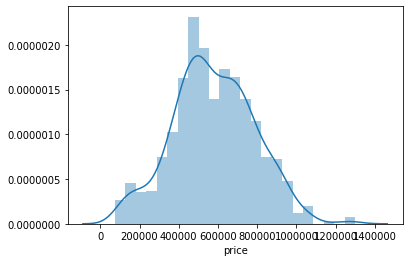

In [45]:
sns.distplot(auto_data['price'])

In [46]:
#skewness and kurtosis
print("Skewness: %f" % auto_data['price'].skew())
print("Kurtosis: %f" % auto_data['price'].kurt())

Skewness: 0.076603
Kurtosis: -0.072519


In [47]:
# распределение цены близко к нормальному

In [48]:
# посмотрим на уникальные значения цветов

auto_data['color'].unique()

array(['белый', 'чёрный', 'серый', 'зелёный', 'бежевый', 'коричневый',
       'серебристый', 'красный', 'оранжевый', 'голубой', 'синий',
       'золотистый', 'жёлтый', 'фиолетовый'], dtype=object)

In [49]:
len(auto_data['color'].unique())

14

In [50]:
# Уникальные значения объемов двигателя

auto_data['engine_volume'].unique()

array([1.6, 1.4, 1.5, 1.3])

In [51]:
# Уникальные значения мощностей двигателя

auto_data['engine_power'].unique()

array([123, 107, 100,  97,  98,  95, 112,  75, 105,  84, 108])

In [52]:
# Уникальные значения типа топлива

auto_data['fuel_type'].unique()

array([' Бензин', ' Бензин, газобаллонное оборудование'], dtype=object)

In [53]:
auto_data['fuel_type'] = auto_data['fuel_type'].str.replace('газобаллонное оборудование','ГБО')

In [54]:
auto_data['fuel_type'].unique()

array([' Бензин', ' Бензин, ГБО'], dtype=object)

In [55]:
# Уникальные значения по количеству владельцев

auto_data['owners_count'].unique()

array(['1 владелец', '3 или более', '2 владельца'], dtype=object)

In [56]:
auto_data.groupby(['year', 'owners_count'])['price', 'km_age'].mean()

C:\Users\user1174\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


price         km_age
year owners_count                              
2000 3 или более    85000.000000  190002.000000
2001 1 владелец     75000.000000  207000.000000
     3 или более    99999.666667  195333.333333
2002 3 или более   133888.777778  198050.000000
2003 1 владелец    149000.000000  230000.000000
     2 владельца   207500.000000  200000.000000
     3 или более   149888.888889  226405.222222
2004 2 владельца   175800.000000  172946.800000
     3 или более   158500.000000  197132.100000
2005 2 владельца   180833.333333  210260.000000
     3 или более   181272.727273  223945.909091
2006 1 владелец    262500.000000  155981.500000
     2 владельца   345000.000000  110000.000000
     3 или более   251571.285714  207160.714286
2007 3 или более   254250.000000  196467.250000
2009 1 владелец    361000.000000  152540.333333
     2 владельца   338671.428571  129719.285714
     3 или более   281111.111111  148500.000000
2010 1 владелец    350340.000000  135773.100000
     2 владельца   372222.222222  117564.555556
     3 или более   337384.615385  157017.153846
2011 1 владелец    415240.000000  129161.400000
     2 владельца   408595.600000  127148.150000
     3 или более   378000.000000  139140.000000
2012 1 владелец    503391.304348  113063.956522
     2 владельца   459892.857143  143219.214286
     3 или более   423095.238095  164480.523810
2013 1 владелец    499095.904762  147495.190476
     2 владельца   472319.758621  130070.172414
     3 или более   449461.538462  145431.692308
2014 1 владелец    531910.975610  105706.365854
     2 владельца   510555.250000  123772.000000
     3 или более   421333.333333  160487.666667
2015 1 владелец    600500.250000   90990.076923
     2 владельца   542934.760870  114460.239130
     3 или более   511461.538462  151831.307692
2016 1 владелец    630936.340659   95387.186813
     2 владельца   588684.782609  108442.673913
     3 или более   515357.142857  139256.428571
2017 1 владелец    726874.659091   68553.984848
     2 владельца   705024.365854   69642.292683
     3 или более   627487.500000   68557.875000
2018 1 владелец    836963.963964   49294.243243
     2 владельца   780363.636364   58019.909091
     3 или более   929000.000000   23450.000000
2019 1 владелец    949773.600000   22305.525000
     2 владельца   927500.000000   41750.000000
2020 1 владелец    900000.000000   20000.000000

In [57]:
# сгруппируем по модельному ряду и посмотрим среднюю цену

auto_data.groupby('model')['price'].mean()

model
Kia Rio I                 118928.428571
Kia Rio I Рестайлинг      167731.707317
Kia Rio II                274951.814815
Kia Rio II Рестайлинг     357171.428571
Kia Rio III               479681.907534
Kia Rio III Рестайлинг    612702.659574
Kia Rio IV                798263.054054
Kia Rio IV X-Line         931360.074074
Name: price, dtype: float64

In [58]:
# сгруппируем по году выпуска и посмотрим среднюю цену

auto_data.groupby('year')['price'].mean()

year
2000     85000.000000
2001     93749.750000
2002    133888.777778
2003    159416.666667
2004    164266.666667
2005    181117.647059
2006    270545.363636
2007    254250.000000
2009    314931.578947
2010    355839.024390
2011    400611.866667
2012    463055.555556
2013    471898.513158
2014    505296.795455
2015    560475.903226
2016    607349.052980
2017    717532.342541
2018    828358.208955
2019    948712.952381
2020    900000.000000
Name: price, dtype: float64

In [59]:
auto_data.groupby(['year', 'passport'])['price'].mean()

year  passport
2000  Оригинал     85000.000000
2001  Дубликат    100000.000000
      Оригинал     91666.333333
2002  Дубликат    167500.000000
      Оригинал    124285.571429
2003  Дубликат    111250.000000
      Оригинал    183500.000000
2004  Дубликат    166000.000000
      Оригинал    163636.363636
2005  Дубликат    183333.333333
      Оригинал    180642.857143
2006  Дубликат    231750.000000
      Оригинал    292714.142857
2007  Дубликат    268500.000000
      Оригинал    240000.000000
2009  Дубликат    249000.000000
      Оригинал    318594.444444
2010  Дубликат    308400.000000
      Оригинал    362427.777778
2011  Дубликат    345000.000000
      Оригинал    407956.830189
2012  Дубликат    443500.000000
      Оригинал    465500.000000
2013  Дубликат    482250.000000
      Оригинал    470680.691176
2014  Дубликат    435000.000000
      Оригинал    509531.542169
2015  Дубликат    560000.000000
      Оригинал    560508.724138
2016  Дубликат    550000.000000
      Оригинал    609722.

## Графики

In [60]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [132]:
df = auto_data

In [133]:
# Построим Box Plot по годам выпуска

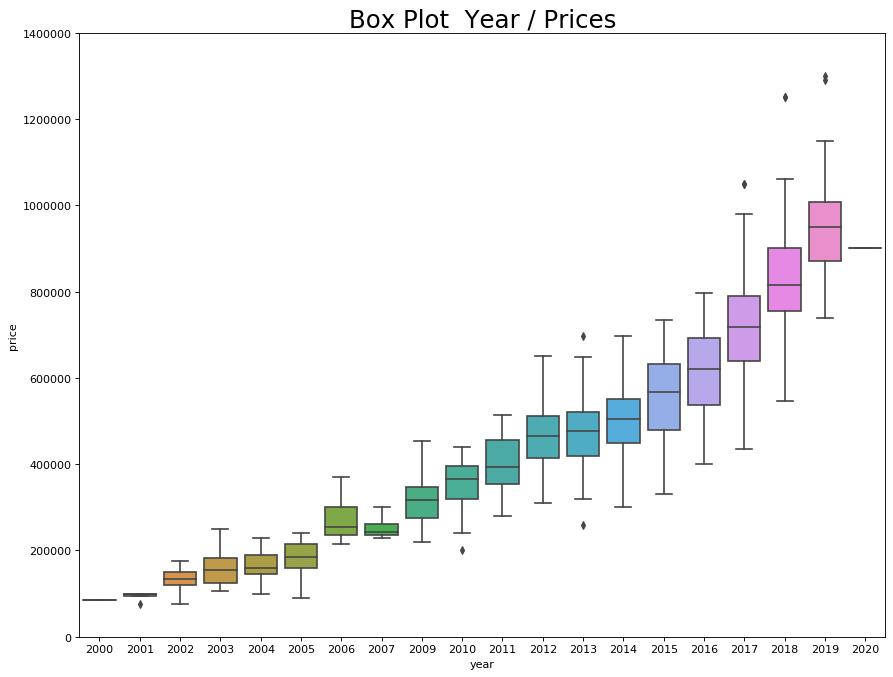

In [134]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1400000)
plt.show()

In [135]:
# На графике присутствуют "выбросы" по цене

In [136]:
# удалим выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

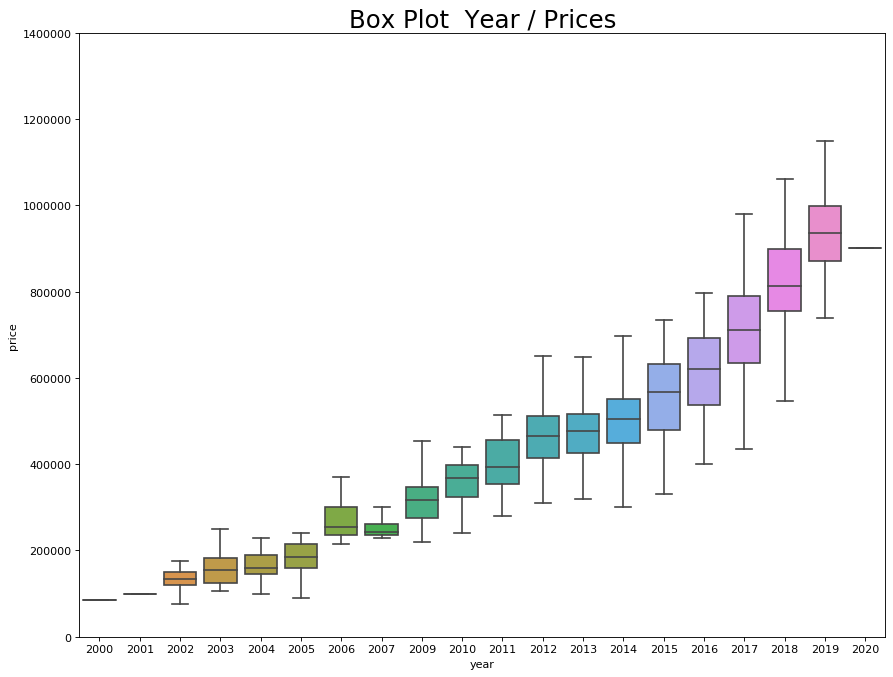

In [137]:
# посмотрим еще раз на график цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1400000)
plt.show()

In [138]:
# как видно из графика, выбросы исчезли

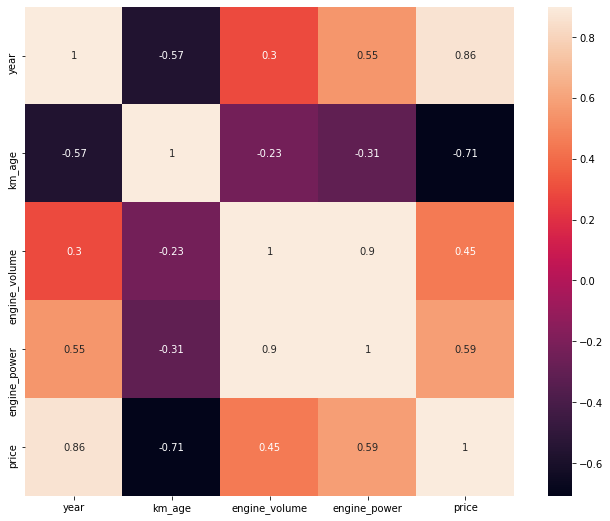

In [139]:
# посмотрим на матрицу корреляций

corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, annot=True)

In [140]:
# На матрице корреляций можно увидеть, что признаки 'engine_volume' и 'engine_power' сильно коррелируют между собой
# действительно, между ними прямая взаимосвязь, чем больше объем двигателя, тем больше мощность.
# удалим 'engine_volume', т.к. при одинаковых объемах двигателя может быть различная мощность у разных поколений автомобилей

In [141]:
df.drop(['engine_volume'], axis='columns', inplace=True)

In [142]:
df.head()

,model,year,km_age,body_type,color,engine_power,fuel_type,transmission,owners_count,passport,price
0,Kia Rio IV,2017,57000,седан,белый,123,Бензин,автоматическая,1 владелец,Оригинал,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,чёрный,123,Бензин,автоматическая,1 владелец,Оригинал,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,серый,123,Бензин,механическая,1 владелец,Оригинал,695000
3,Kia Rio III,2015,240000,седан,серый,107,Бензин,механическая,3 или более,Оригинал,350000
5,Kia Rio III,2013,115000,седан,серый,107,Бензин,механическая,2 владельца,Оригинал,410000


In [143]:
# Посмотрим на столбчатую диаграмму средней цены по годам в зависимости от количества владельцев

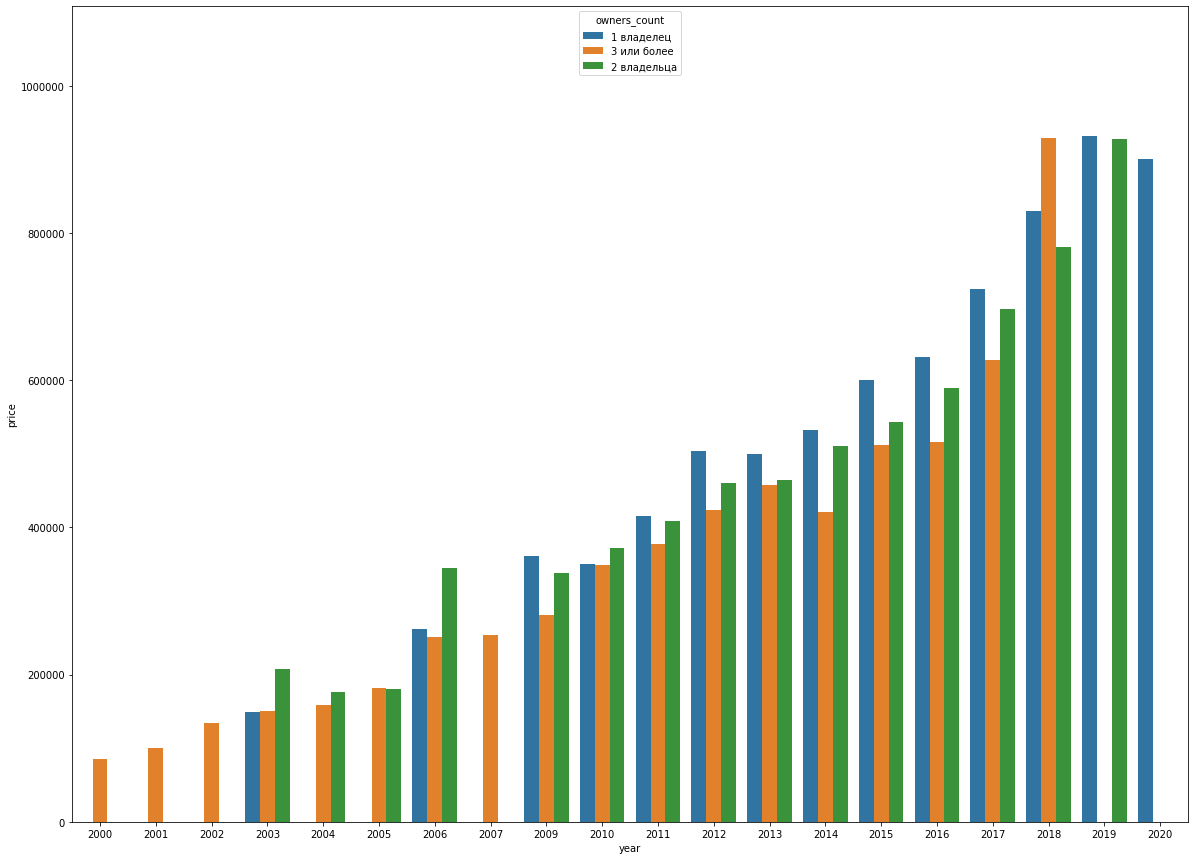

In [144]:
plt.rcParams['figure.figsize']=(20,15)
sns.barplot(x='year', y='price', hue='owners_count', errwidth=0, data=df)

In [145]:
# В большинстве годов автомобили с одним владельцем стоят дороже, дешевле с двумя и еще дешевле с 3 и более. Это не очень старые
# автомобили, на которые есть хороший спрос.

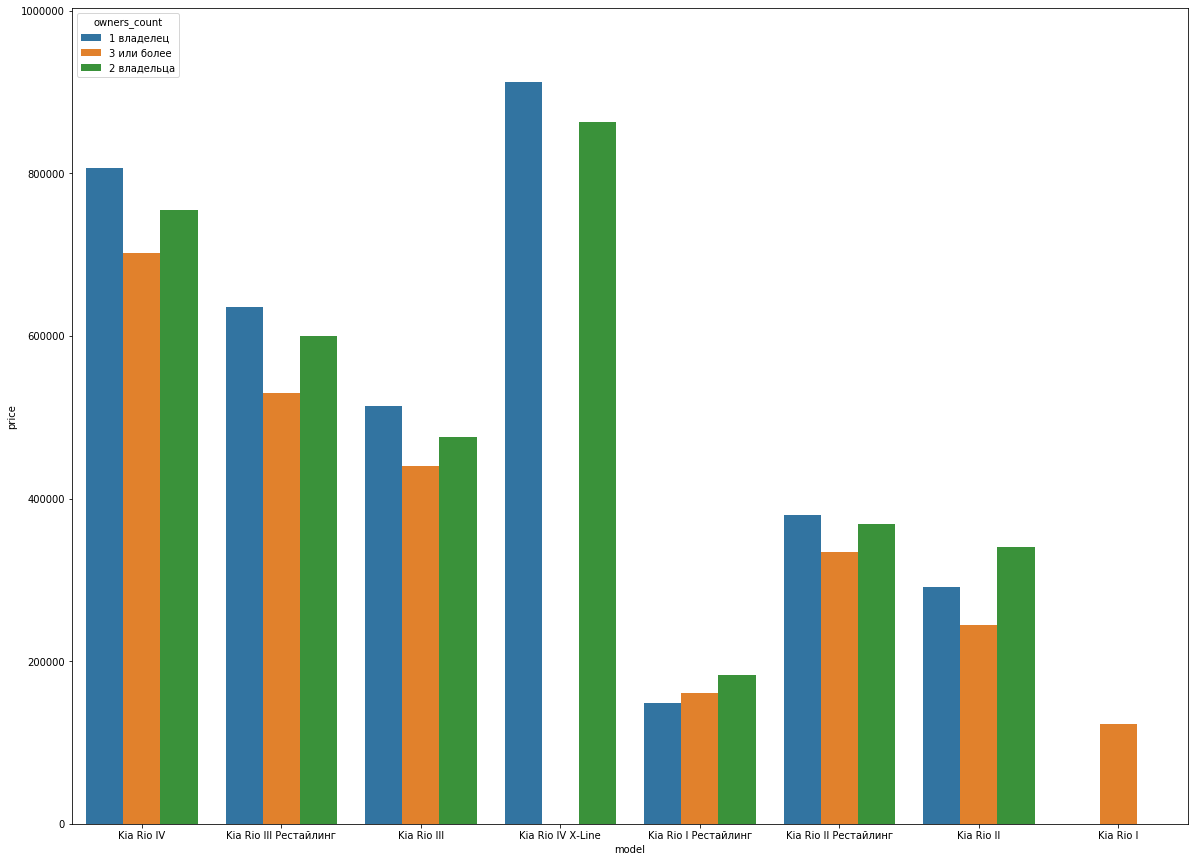

In [146]:
plt.rcParams['figure.figsize']=(20,15)
sns.barplot(x='model', y='price', hue='owners_count', errwidth=0, data=df)

In [147]:
# Такая же картина начиная со 2 поколения с рестайлингом.

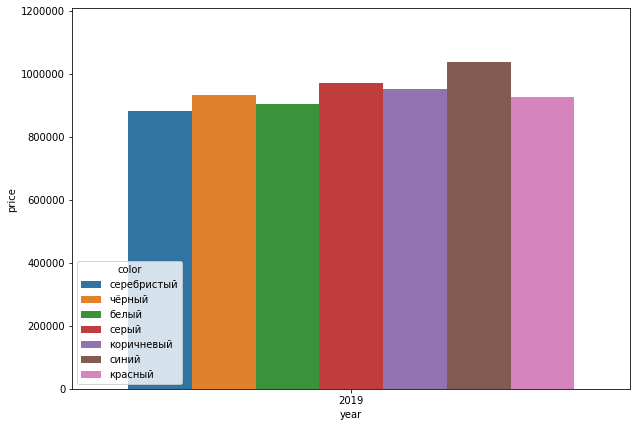

In [148]:
# Цена, в зависимости от цвета

plt.rcParams['figure.figsize']=(10,7)
sns.barplot(x='year', y='price', hue='color', errwidth=0, data=df.loc[df['year'] == 2019])

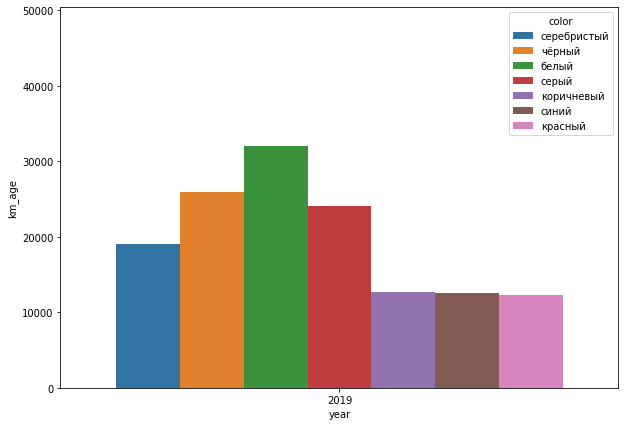

In [149]:
plt.rcParams['figure.figsize']=(10,7)
sns.barplot(x='year', y='km_age', hue='color', errwidth=0, data=df.loc[df['year'] == 2019])

##### На двух последних столбчатых диаграммах мы показали автомобили 2019 года с разбивкой цены по цветам и пробега по цветам.
##### Как видно из этих диаграмм, цвет не влияет на цену (или влияет очень несущественно при прочих равных условиях),
##### например серебристые автомобили 2019 года имеют самую высокую среднюю цену, но при этом у них самый маленький средний пробег.
##### Белые автомобили (3-й столбец), напротив, имеют самую низкую цену, но самый высокий пробег, хотя белый цвет довольно популярный.

In [150]:
# проверим картину для 2018 года

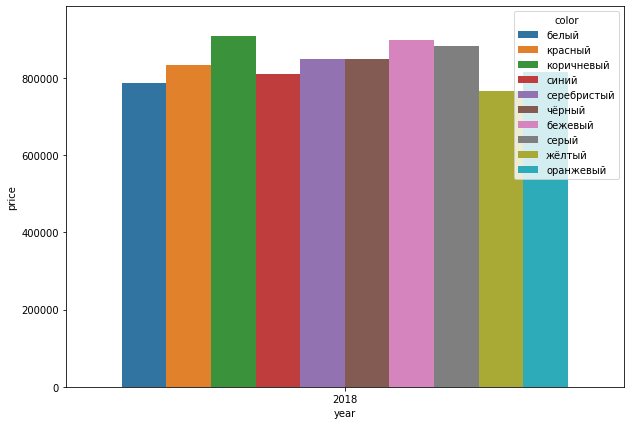

In [151]:
plt.rcParams['figure.figsize']=(10,7)
sns.barplot(x='year', y='price', hue='color', errwidth=0, data=df.loc[df['year'] == 2018])

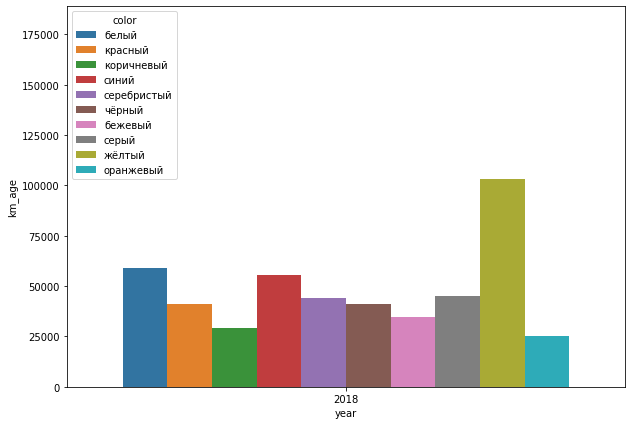

In [152]:
plt.rcParams['figure.figsize']=(10,7)
sns.barplot(x='year', y='km_age', hue='color', errwidth=0, data=df.loc[df['year'] == 2018])

In [153]:
# Картина примерно такая же

In [154]:
# удалим столбец с цветом

df.drop(['color'], axis='columns', inplace=True)

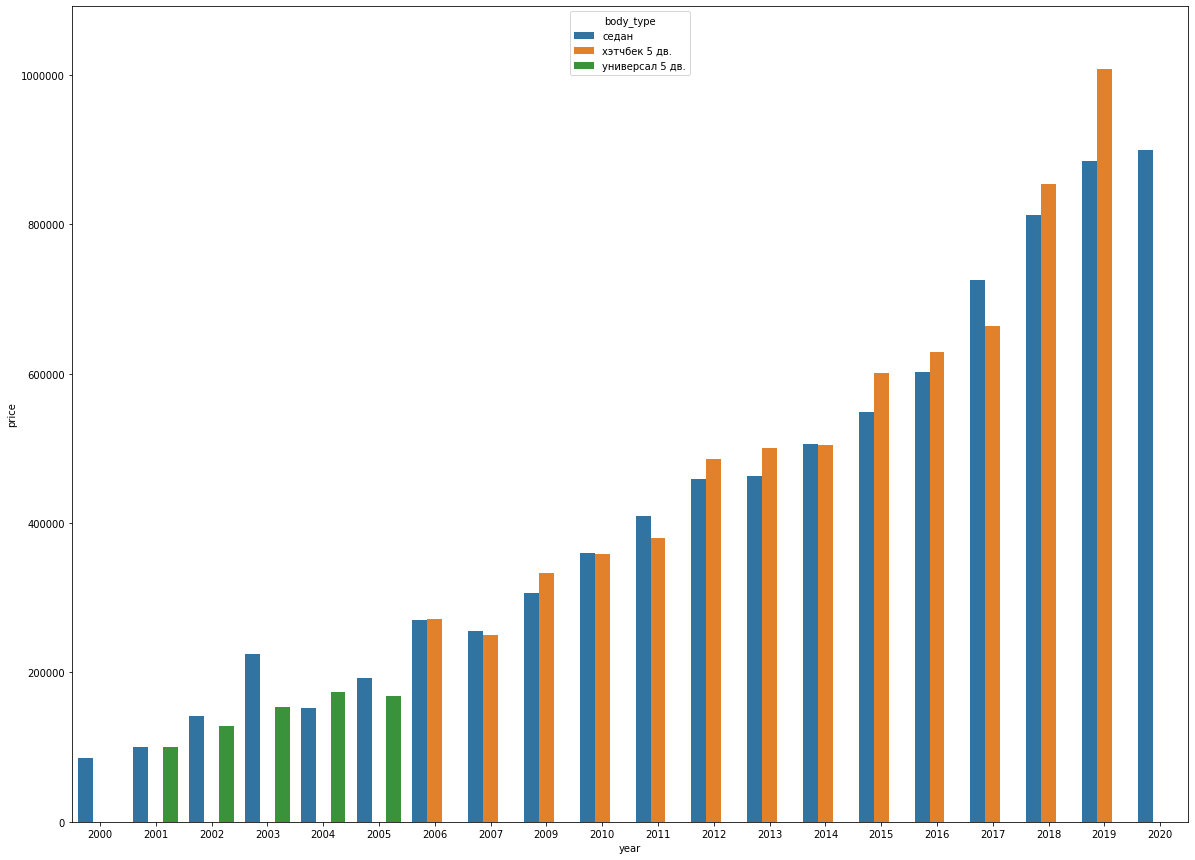

In [155]:
plt.rcParams['figure.figsize']=(20,15)
sns.barplot(x='year', y='price', hue='body_type', errwidth=0, data=df)

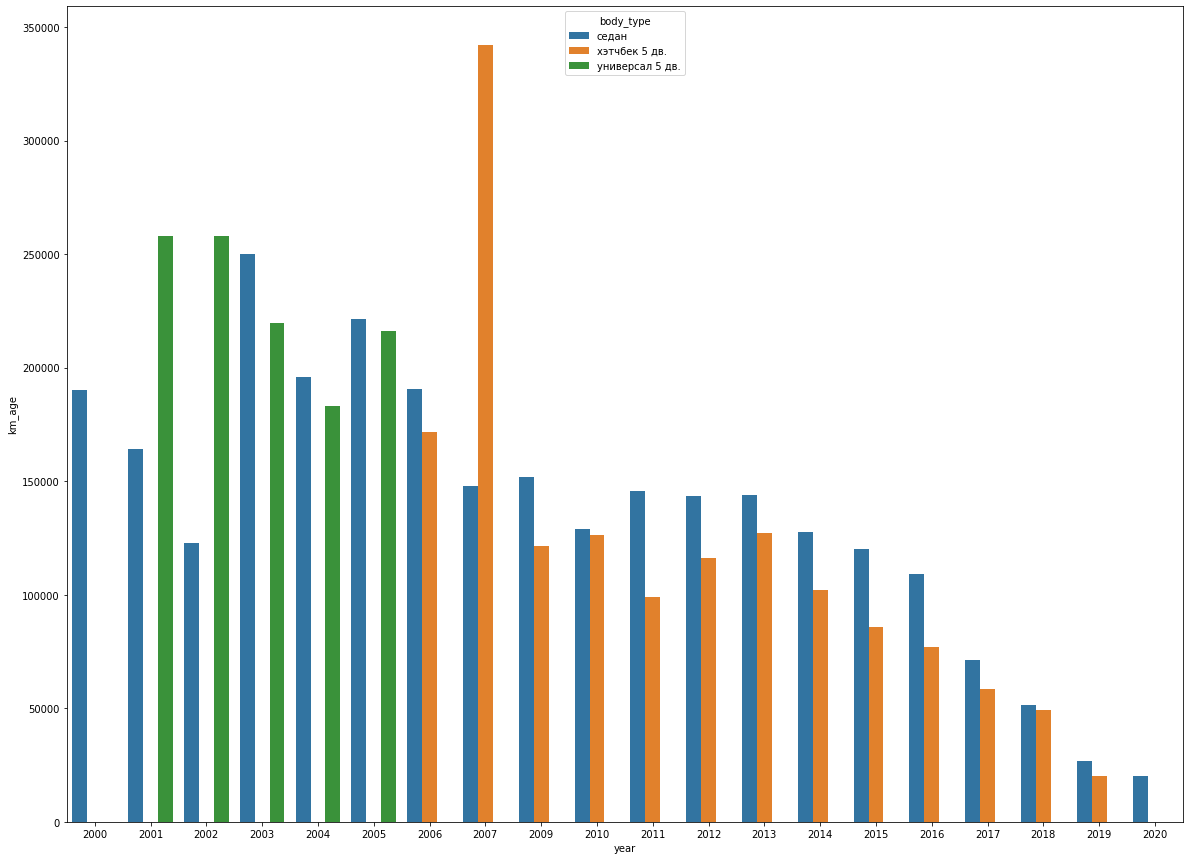

In [156]:
plt.rcParams['figure.figsize']=(20,15)
sns.barplot(x='year', y='km_age', hue='body_type', errwidth=0, data=df)

In [157]:
# в большинстве годов выпуска хэтчбеки стоили немного дороже седанов
# Но у хэтчбеков был ниже пробег по годам

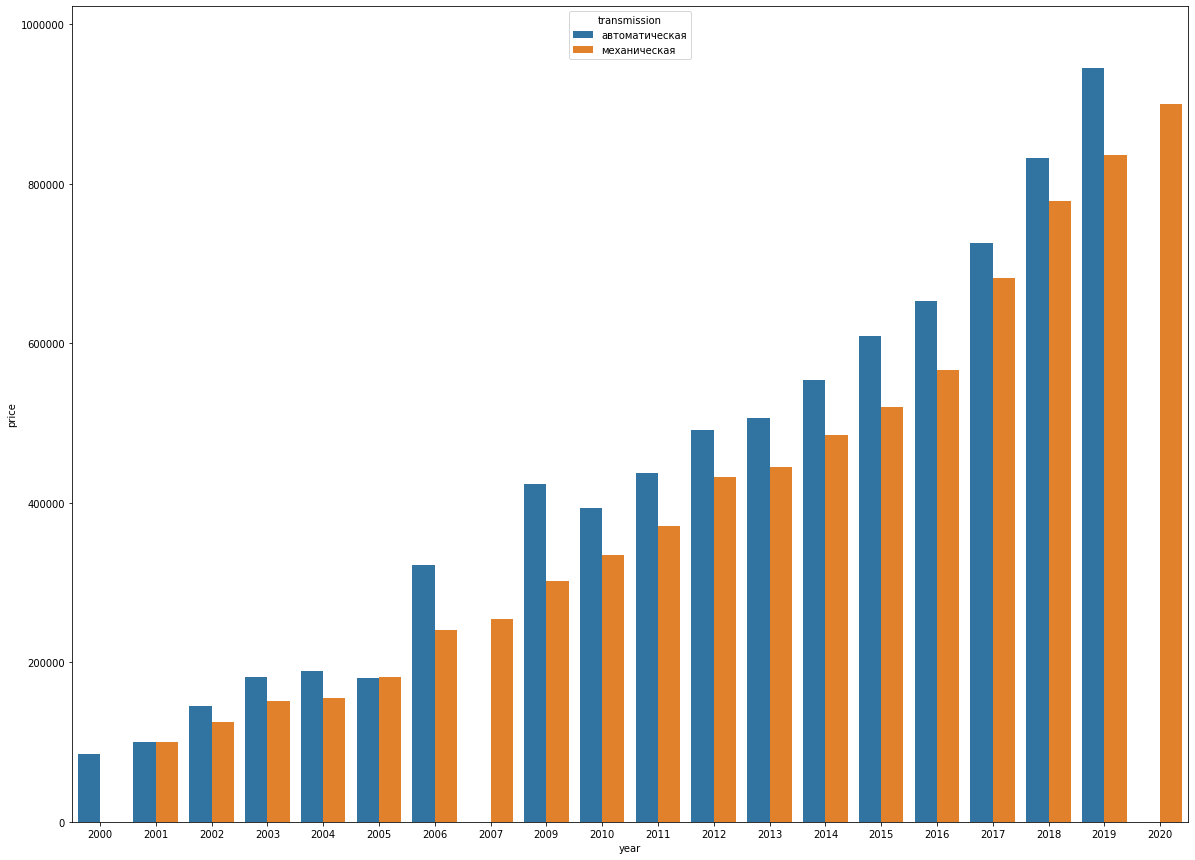

In [158]:
# Диаграмма по типу трансмиссии

plt.rcParams['figure.figsize']=(20,15)
sns.barplot(x='year', y='price', hue='transmission', errwidth=0, data=df)

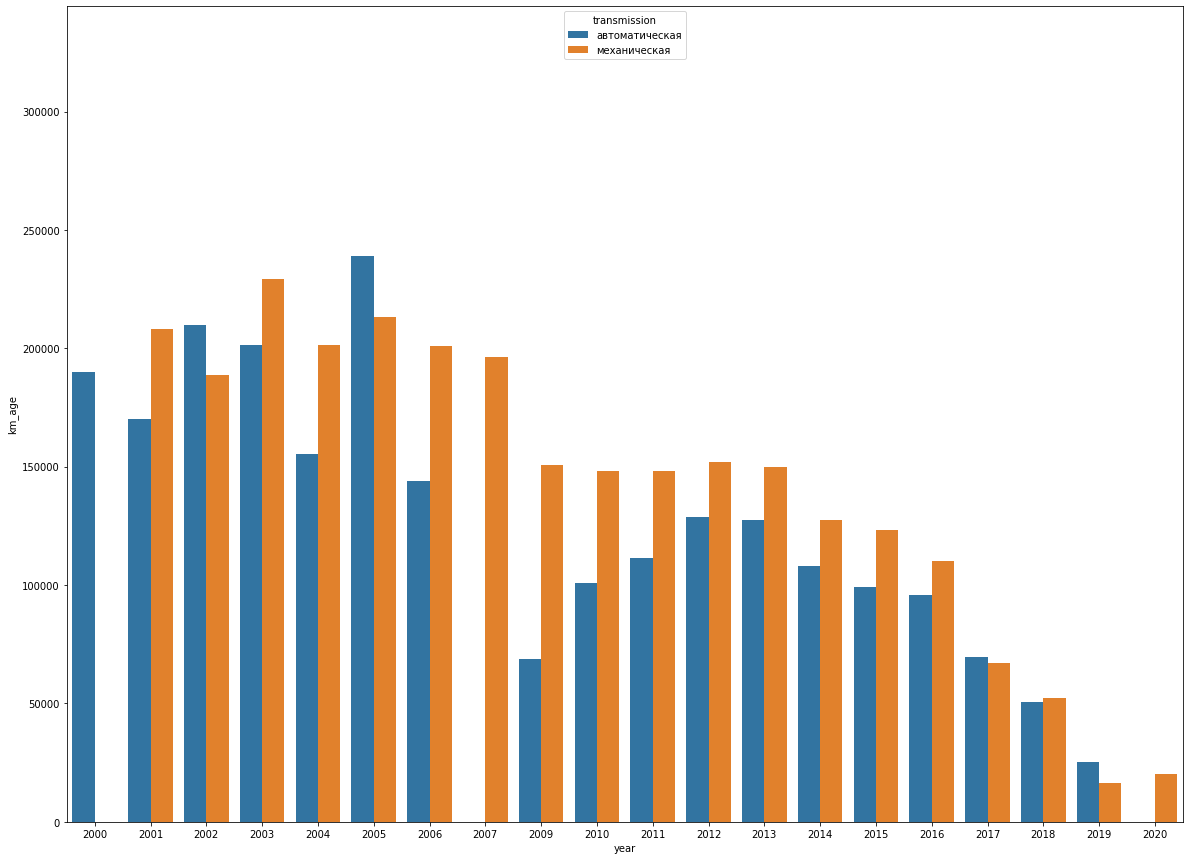

In [159]:
plt.rcParams['figure.figsize']=(20,15)
sns.barplot(x='year', y='km_age', hue='transmission', errwidth=0, data=df)

In [160]:
# автомобили с автоматической трансмиссией стоят дороже, но средний пробег по годам больше на "механике"
# новые автомобили на автомате стоят дороже, примем допущение, что и на подержанные распространяется такое явление

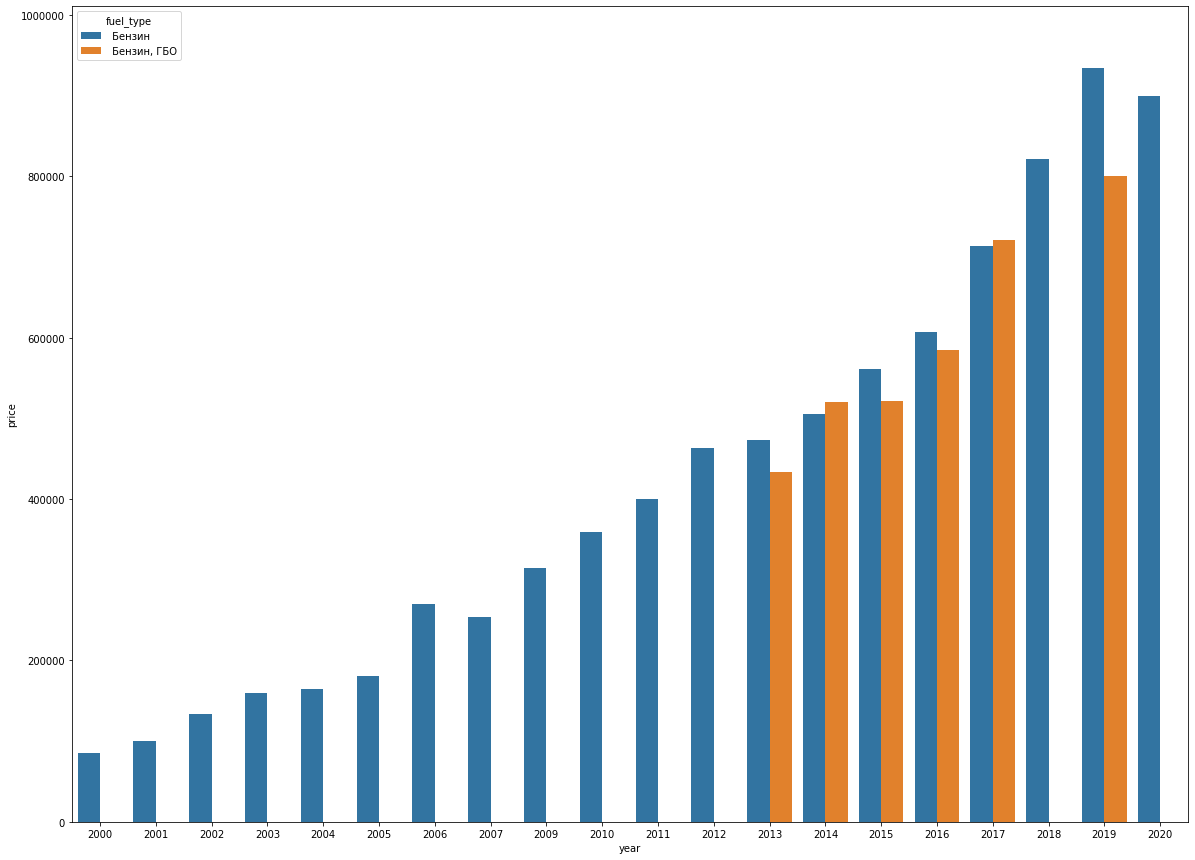

In [161]:
# Диаграммы по типу топлива

plt.rcParams['figure.figsize']=(20,15)
sns.barplot(x='year', y='price', hue='fuel_type', errwidth=0, data=df)

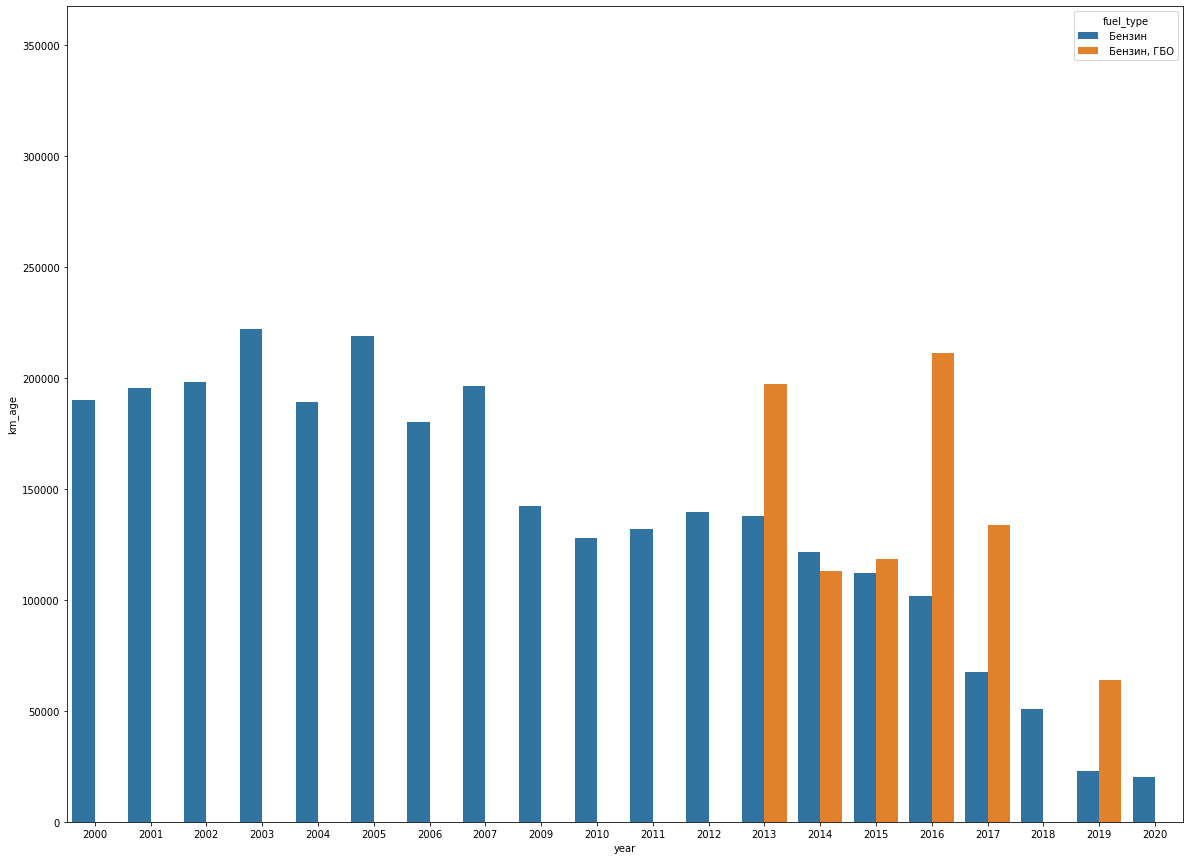

In [162]:
plt.rcParams['figure.figsize']=(20,15)
sns.barplot(x='year', y='km_age', hue='fuel_type', errwidth=0, data=df)

In [163]:
df.groupby('fuel_type').count()['model']

fuel_type
 Бензин         1039
 Бензин, ГБО      14
Name: model, dtype: int64

In [164]:
# автомобилей, оснащенных ГБО, всего 14 в нашей выборке, 1.3%, это несущественно, тем более из двух последних графиков
# видно, что цена автомобилей с ГБО зависит от пробега

In [165]:
# удалим этот столбец

df.drop(['fuel_type'], axis='columns', inplace=True)

In [166]:
df.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,passport,price
0,Kia Rio IV,2017,57000,седан,123,автоматическая,1 владелец,Оригинал,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,123,автоматическая,1 владелец,Оригинал,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,123,механическая,1 владелец,Оригинал,695000
3,Kia Rio III,2015,240000,седан,107,механическая,3 или более,Оригинал,350000
5,Kia Rio III,2013,115000,седан,107,механическая,2 владельца,Оригинал,410000


In [167]:
df.groupby('passport').count()['model']

passport
Дубликат     72
Оригинал    981
Name: model, dtype: int64

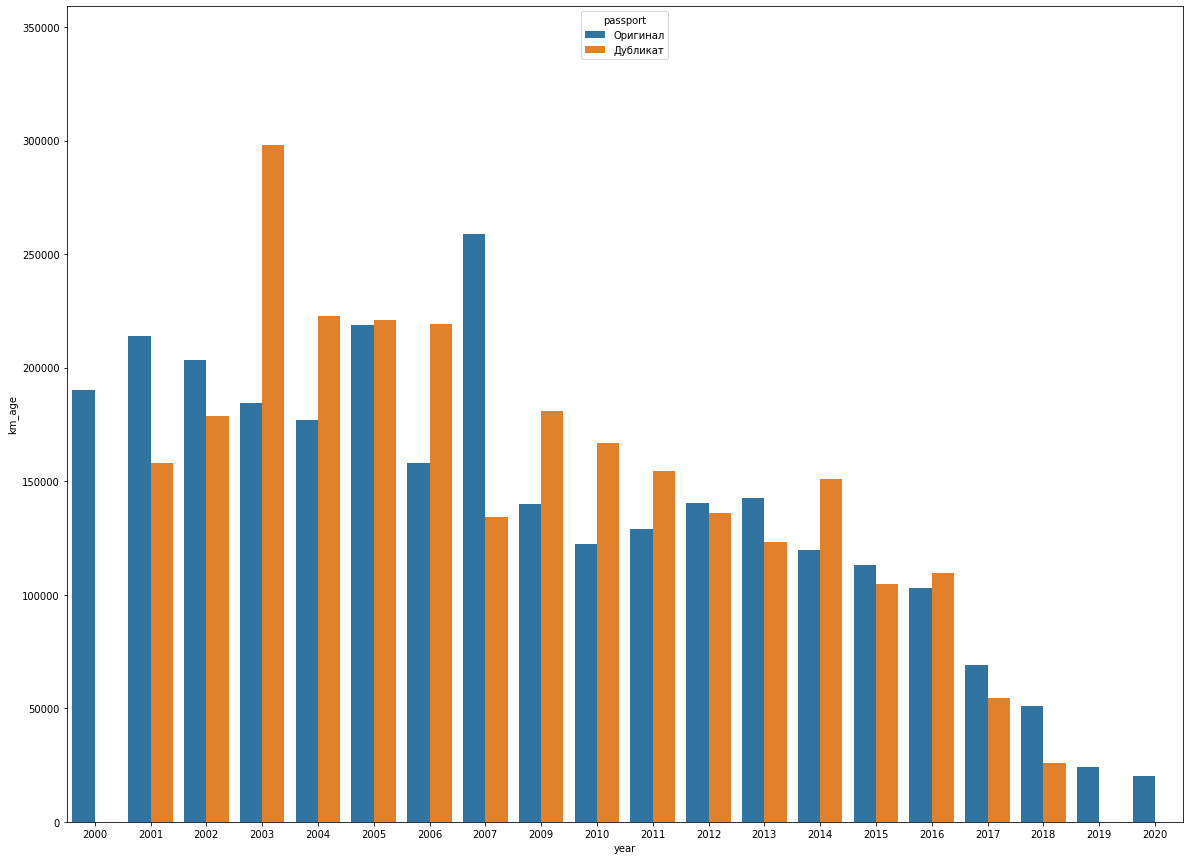

In [168]:
plt.rcParams['figure.figsize']=(20,15)
sns.barplot(x='year', y='km_age', hue='passport', errwidth=0, data=df)

In [169]:
# дубликат ПТС выдается, когда закончилось место в оригинале, либо при утере/порче. Место может закончиться, если много
# владельцев, причем из дубликата будет не известна информация о предыдущем ПТС - сколько там было владельцев.
# если покупатель будет делать выбор при прочих равных условиях, он выберет автомобиль с оригинальным ПТС


In [170]:
df.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,passport,price
0,Kia Rio IV,2017,57000,седан,123,автоматическая,1 владелец,Оригинал,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,123,автоматическая,1 владелец,Оригинал,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,123,механическая,1 владелец,Оригинал,695000
3,Kia Rio III,2015,240000,седан,107,механическая,3 или более,Оригинал,350000
5,Kia Rio III,2013,115000,седан,107,механическая,2 владельца,Оригинал,410000


In [107]:
df.drop(['passport'], axis='columns', inplace=True)

In [110]:
df.drop(['body_type'], axis='columns', inplace=True)

In [171]:
df_temp = df

In [172]:
df_temp.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,passport,price
0,Kia Rio IV,2017,57000,седан,123,автоматическая,1 владелец,Оригинал,770000
1,Kia Rio III Рестайлинг,2016,19086,хэтчбек 5 дв.,123,автоматическая,1 владелец,Оригинал,709000
2,Kia Rio III Рестайлинг,2017,105860,седан,123,механическая,1 владелец,Оригинал,695000
3,Kia Rio III,2015,240000,седан,107,механическая,3 или более,Оригинал,350000
5,Kia Rio III,2013,115000,седан,107,механическая,2 владельца,Оригинал,410000


## Алгоритм CatBoost

In [173]:
df.dtypes

model           object
year             int32
km_age           int32
body_type       object
engine_power     int32
transmission    object
owners_count    object
passport        object
price            int32
dtype: object

### Назначаем X и y

In [174]:
X = df.drop(['price'], axis=1)
y = df['price']

In [109]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
categorical_features_indices = np.where(X.dtypes == np.object)[0]

model = CatBoostRegressor()
parameters = {'depth'         : [3,4,5],
              'learning_rate' : [0.03,0.05, 0.1],
              'iterations'    : [800],
              'subsample'     : [0.3, 0.5, 1]
            }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train, cat_features=categorical_features_indices)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
    grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
    grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
    grid.best_params_)
    
print("\n ========================================================")

0:	learn: 199933.6843079	total: 47.5ms	remaining: 38s
1:	learn: 193698.5998290	total: 49.4ms	remaining: 19.7s
2:	learn: 187111.6972282	total: 51.2ms	remaining: 13.6s
3:	learn: 180664.9076070	total: 52.6ms	remaining: 10.5s
4:	learn: 174788.4298460	total: 55.6ms	remaining: 8.84s
5:	learn: 169102.8167973	total: 57.8ms	remaining: 7.65s
6:	learn: 163453.3484808	total: 59ms	remaining: 6.68s
7:	learn: 158530.9362618	total: 60.1ms	remaining: 5.95s
8:	learn: 153588.9105835	total: 61.9ms	remaining: 5.44s
9:	learn: 148944.9743488	total: 63.6ms	remaining: 5.03s
10:	learn: 144280.3457539	total: 65.3ms	remaining: 4.68s
11:	learn: 140088.2237860	total: 66.5ms	remaining: 4.37s
12:	learn: 136282.0727495	total: 68.8ms	remaining: 4.17s
13:	learn: 132747.8231108	total: 70.9ms	remaining: 3.98s
14:	learn: 129077.8094849	total: 72.1ms	remaining: 3.77s
15:	learn: 125474.6937683	total: 74ms	remaining: 3.62s
16:	learn: 122155.8050140	total: 75.4ms	remaining: 3.47s
17:	learn: 119201.9745019	total: 77.1ms	remaini

233:	learn: 53252.6114983	total: 335ms	remaining: 809ms
234:	learn: 53238.4999421	total: 336ms	remaining: 809ms
235:	learn: 53161.9394108	total: 338ms	remaining: 808ms
236:	learn: 53154.2142536	total: 340ms	remaining: 807ms
237:	learn: 53135.4148850	total: 341ms	remaining: 806ms
238:	learn: 53127.8971096	total: 342ms	remaining: 802ms
239:	learn: 53121.2294780	total: 342ms	remaining: 799ms
240:	learn: 53112.4374538	total: 344ms	remaining: 798ms
241:	learn: 53085.0508425	total: 345ms	remaining: 796ms
242:	learn: 53054.0129400	total: 346ms	remaining: 794ms
243:	learn: 53027.6896080	total: 348ms	remaining: 793ms
244:	learn: 53016.7557901	total: 350ms	remaining: 792ms
245:	learn: 53004.0393412	total: 351ms	remaining: 791ms
246:	learn: 52996.6631305	total: 352ms	remaining: 789ms
247:	learn: 52959.9931839	total: 355ms	remaining: 790ms
248:	learn: 52944.1656032	total: 355ms	remaining: 786ms
249:	learn: 52923.9303545	total: 357ms	remaining: 784ms
250:	learn: 52914.1213008	total: 358ms	remaining

473:	learn: 50184.8339565	total: 627ms	remaining: 431ms
474:	learn: 50176.1658309	total: 628ms	remaining: 430ms
475:	learn: 50170.7142018	total: 630ms	remaining: 429ms
476:	learn: 50168.0275099	total: 631ms	remaining: 427ms
477:	learn: 50167.6599168	total: 632ms	remaining: 426ms
478:	learn: 50166.1282017	total: 634ms	remaining: 425ms
479:	learn: 50164.4531175	total: 635ms	remaining: 423ms
480:	learn: 50155.0094713	total: 637ms	remaining: 422ms
481:	learn: 50153.2272369	total: 639ms	remaining: 421ms
482:	learn: 50143.9102164	total: 640ms	remaining: 420ms
483:	learn: 50140.9228811	total: 642ms	remaining: 419ms
484:	learn: 50125.5195953	total: 644ms	remaining: 418ms
485:	learn: 50116.0694600	total: 645ms	remaining: 417ms
486:	learn: 50104.3921385	total: 647ms	remaining: 416ms
487:	learn: 50088.4496859	total: 648ms	remaining: 414ms
488:	learn: 50044.4676317	total: 649ms	remaining: 413ms
489:	learn: 50038.5082205	total: 651ms	remaining: 412ms
490:	learn: 50030.8644800	total: 653ms	remaining

684:	learn: 48192.9839709	total: 923ms	remaining: 155ms
685:	learn: 48190.8517944	total: 924ms	remaining: 154ms
686:	learn: 48186.3340515	total: 925ms	remaining: 152ms
687:	learn: 48177.6621220	total: 927ms	remaining: 151ms
688:	learn: 48173.8149542	total: 929ms	remaining: 150ms
689:	learn: 48169.5529610	total: 930ms	remaining: 148ms
690:	learn: 48162.0296370	total: 930ms	remaining: 147ms
691:	learn: 48151.4635095	total: 932ms	remaining: 145ms
692:	learn: 48150.7115203	total: 934ms	remaining: 144ms
693:	learn: 48144.6194095	total: 935ms	remaining: 143ms
694:	learn: 48131.0103109	total: 937ms	remaining: 142ms
695:	learn: 48125.1706616	total: 939ms	remaining: 140ms
696:	learn: 48119.1735674	total: 940ms	remaining: 139ms
697:	learn: 48104.0445085	total: 943ms	remaining: 138ms
698:	learn: 48094.4837204	total: 944ms	remaining: 136ms
699:	learn: 48086.2836528	total: 945ms	remaining: 135ms
700:	learn: 48078.6589929	total: 947ms	remaining: 134ms
701:	learn: 48062.9435098	total: 949ms	remaining

In [175]:
model = CatBoostRegressor(iterations=800,
                          learning_rate=0.05,
                          subsample=0.5,
                          depth=3)

In [176]:
# Fit model
model.fit(X_train, y_train, cat_features=categorical_features_indices)

0:	learn: 199867.5134945	total: 4.18ms	remaining: 3.34s
1:	learn: 193014.1582964	total: 6.76ms	remaining: 2.7s
2:	learn: 186457.6146658	total: 8.42ms	remaining: 2.23s
3:	learn: 179932.1010893	total: 9.87ms	remaining: 1.96s
4:	learn: 174306.2819718	total: 11.6ms	remaining: 1.84s
5:	learn: 168481.3447190	total: 14.1ms	remaining: 1.87s
6:	learn: 163211.3765110	total: 15.6ms	remaining: 1.77s
7:	learn: 157838.7399758	total: 17.7ms	remaining: 1.75s
8:	learn: 152723.9854509	total: 26.8ms	remaining: 2.36s
9:	learn: 148065.8854487	total: 29.3ms	remaining: 2.31s
10:	learn: 143637.4734864	total: 31.2ms	remaining: 2.24s
11:	learn: 139544.9590438	total: 34.1ms	remaining: 2.24s
12:	learn: 135568.2155062	total: 36.5ms	remaining: 2.21s
13:	learn: 131767.0233241	total: 40.2ms	remaining: 2.25s
14:	learn: 128587.7851652	total: 42.6ms	remaining: 2.23s
15:	learn: 124827.7186718	total: 46.7ms	remaining: 2.29s
16:	learn: 121493.1164170	total: 48.7ms	remaining: 2.24s
17:	learn: 118151.8505942	total: 51.6ms	re

184:	learn: 54107.9223707	total: 299ms	remaining: 993ms
185:	learn: 54103.6500957	total: 300ms	remaining: 991ms
186:	learn: 54082.8037780	total: 302ms	remaining: 990ms
187:	learn: 54066.6926742	total: 304ms	remaining: 990ms
188:	learn: 54053.9876098	total: 307ms	remaining: 991ms
189:	learn: 54017.4395609	total: 309ms	remaining: 993ms
190:	learn: 53983.5723205	total: 312ms	remaining: 994ms
191:	learn: 53956.5469765	total: 314ms	remaining: 993ms
192:	learn: 53922.9232690	total: 314ms	remaining: 988ms
193:	learn: 53897.2792644	total: 316ms	remaining: 987ms
194:	learn: 53885.3782174	total: 318ms	remaining: 985ms
195:	learn: 53870.1623255	total: 319ms	remaining: 982ms
196:	learn: 53859.3958325	total: 321ms	remaining: 981ms
197:	learn: 53854.5905462	total: 321ms	remaining: 976ms
198:	learn: 53787.3907893	total: 323ms	remaining: 975ms
199:	learn: 53765.1593842	total: 325ms	remaining: 975ms
200:	learn: 53760.1346985	total: 326ms	remaining: 973ms
201:	learn: 53737.5245637	total: 328ms	remaining

388:	learn: 50831.7234597	total: 590ms	remaining: 623ms
389:	learn: 50814.7573161	total: 592ms	remaining: 622ms
390:	learn: 50799.0617269	total: 593ms	remaining: 620ms
391:	learn: 50797.5447123	total: 594ms	remaining: 618ms
392:	learn: 50793.8141297	total: 594ms	remaining: 615ms
393:	learn: 50787.0691475	total: 596ms	remaining: 614ms
394:	learn: 50780.4744337	total: 597ms	remaining: 612ms
395:	learn: 50767.0793995	total: 599ms	remaining: 611ms
396:	learn: 50764.6408176	total: 601ms	remaining: 610ms
397:	learn: 50753.2787088	total: 602ms	remaining: 608ms
398:	learn: 50745.1407456	total: 603ms	remaining: 606ms
399:	learn: 50731.2280990	total: 604ms	remaining: 604ms
400:	learn: 50726.5096862	total: 606ms	remaining: 603ms
401:	learn: 50724.3004940	total: 607ms	remaining: 601ms
402:	learn: 50714.8205438	total: 609ms	remaining: 600ms
403:	learn: 50708.4807695	total: 609ms	remaining: 597ms
404:	learn: 50703.1653131	total: 611ms	remaining: 596ms
405:	learn: 50698.5661736	total: 613ms	remaining

600:	learn: 48937.5795032	total: 881ms	remaining: 292ms
601:	learn: 48914.7045748	total: 883ms	remaining: 291ms
602:	learn: 48913.5643334	total: 885ms	remaining: 289ms
603:	learn: 48910.1298502	total: 887ms	remaining: 288ms
604:	learn: 48898.3848848	total: 889ms	remaining: 287ms
605:	learn: 48871.9440330	total: 892ms	remaining: 286ms
606:	learn: 48853.8318680	total: 894ms	remaining: 284ms
607:	learn: 48844.4462703	total: 896ms	remaining: 283ms
608:	learn: 48831.4569406	total: 898ms	remaining: 282ms
609:	learn: 48830.0728172	total: 900ms	remaining: 280ms
610:	learn: 48830.0042992	total: 902ms	remaining: 279ms
611:	learn: 48825.6460330	total: 904ms	remaining: 278ms
612:	learn: 48819.2596251	total: 906ms	remaining: 276ms
613:	learn: 48815.7988074	total: 907ms	remaining: 275ms
614:	learn: 48812.3303199	total: 909ms	remaining: 273ms
615:	learn: 48810.9184716	total: 909ms	remaining: 272ms
616:	learn: 48805.6942675	total: 911ms	remaining: 270ms
617:	learn: 48794.3628936	total: 913ms	remaining

In [177]:
# Get predictions
preds = model.predict(X_test)

In [178]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 51763.520568


In [179]:
# удалим признак 'body_type' и посмотрим как изменится RMSE

df.drop(['body_type'], axis='columns', inplace=True)

In [180]:
X = df.drop(['price'], axis=1)
y = df['price']

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
categorical_features_indices = np.where(X.dtypes == np.object)[0]

model = CatBoostRegressor()
parameters = {'depth'         : [3,4,5],
              'learning_rate' : [0.03,0.05, 0.1],
              'iterations'    : [800],
              'subsample'     : [0.3, 0.5, 1]
            }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train, cat_features=categorical_features_indices)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
    grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
    grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
    grid.best_params_)
    
print("\n ========================================================")

0:	learn: 203175.9179217	total: 2.22ms	remaining: 1.77s
1:	learn: 198923.7990680	total: 4.14ms	remaining: 1.65s
2:	learn: 195058.1784156	total: 6.45ms	remaining: 1.71s
3:	learn: 191139.3898414	total: 7.66ms	remaining: 1.52s
4:	learn: 187081.9193726	total: 8.88ms	remaining: 1.41s
5:	learn: 183315.1032765	total: 10.1ms	remaining: 1.34s
6:	learn: 179610.6693391	total: 11.3ms	remaining: 1.28s
7:	learn: 176263.6192674	total: 12.7ms	remaining: 1.26s
8:	learn: 172893.5433202	total: 13.8ms	remaining: 1.22s
9:	learn: 169857.5778401	total: 15.4ms	remaining: 1.22s
10:	learn: 166756.7029601	total: 17.4ms	remaining: 1.25s
11:	learn: 163623.0248712	total: 19ms	remaining: 1.25s
12:	learn: 160689.7255725	total: 20.5ms	remaining: 1.24s
13:	learn: 157743.3691990	total: 21.3ms	remaining: 1.2s
14:	learn: 154640.2683815	total: 22.3ms	remaining: 1.17s
15:	learn: 151815.7350904	total: 23.5ms	remaining: 1.15s
16:	learn: 149390.9939238	total: 25ms	remaining: 1.15s
17:	learn: 146860.6448008	total: 26.6ms	remain

246:	learn: 55155.4234924	total: 279ms	remaining: 626ms
247:	learn: 55140.0597625	total: 281ms	remaining: 624ms
248:	learn: 55089.0806643	total: 282ms	remaining: 624ms
249:	learn: 55073.9071799	total: 283ms	remaining: 622ms
250:	learn: 55061.1903842	total: 284ms	remaining: 621ms
251:	learn: 55049.1010695	total: 284ms	remaining: 619ms
252:	learn: 55044.2050824	total: 285ms	remaining: 617ms
253:	learn: 55019.9697498	total: 287ms	remaining: 617ms
254:	learn: 54954.6420297	total: 288ms	remaining: 615ms
255:	learn: 54915.6024507	total: 289ms	remaining: 614ms
256:	learn: 54885.5223040	total: 291ms	remaining: 614ms
257:	learn: 54874.3533528	total: 291ms	remaining: 612ms
258:	learn: 54858.3816428	total: 293ms	remaining: 612ms
259:	learn: 54847.0890895	total: 293ms	remaining: 610ms
260:	learn: 54832.3703426	total: 295ms	remaining: 608ms
261:	learn: 54809.7193309	total: 296ms	remaining: 607ms
262:	learn: 54790.3397178	total: 297ms	remaining: 607ms
263:	learn: 54774.0125622	total: 298ms	remaining

478:	learn: 52159.0895082	total: 571ms	remaining: 383ms
479:	learn: 52138.3358785	total: 573ms	remaining: 382ms
480:	learn: 52123.1251089	total: 575ms	remaining: 381ms
481:	learn: 52116.8040685	total: 576ms	remaining: 380ms
482:	learn: 52099.0379772	total: 578ms	remaining: 379ms
483:	learn: 52094.6703592	total: 580ms	remaining: 379ms
484:	learn: 52087.4357455	total: 581ms	remaining: 377ms
485:	learn: 52085.5775627	total: 582ms	remaining: 376ms
486:	learn: 52080.4182033	total: 584ms	remaining: 375ms
487:	learn: 52065.1479482	total: 584ms	remaining: 373ms
488:	learn: 52062.1099985	total: 585ms	remaining: 372ms
489:	learn: 52044.1920860	total: 587ms	remaining: 372ms
490:	learn: 52031.2618250	total: 589ms	remaining: 370ms
491:	learn: 52020.4697365	total: 590ms	remaining: 369ms
492:	learn: 52017.6200836	total: 591ms	remaining: 368ms
493:	learn: 52010.1181932	total: 592ms	remaining: 366ms
494:	learn: 51998.9730781	total: 593ms	remaining: 365ms
495:	learn: 51994.3488989	total: 593ms	remaining

700:	learn: 50526.9346761	total: 862ms	remaining: 122ms
701:	learn: 50519.4764199	total: 864ms	remaining: 121ms
702:	learn: 50517.0305611	total: 865ms	remaining: 119ms
703:	learn: 50514.5743063	total: 866ms	remaining: 118ms
704:	learn: 50507.5631778	total: 868ms	remaining: 117ms
705:	learn: 50505.3378467	total: 869ms	remaining: 116ms
706:	learn: 50504.3775885	total: 870ms	remaining: 114ms
707:	learn: 50497.6502735	total: 870ms	remaining: 113ms
708:	learn: 50494.2952463	total: 871ms	remaining: 112ms
709:	learn: 50491.8302121	total: 873ms	remaining: 111ms
710:	learn: 50483.7175372	total: 874ms	remaining: 109ms
711:	learn: 50475.5638609	total: 876ms	remaining: 108ms
712:	learn: 50471.5793251	total: 877ms	remaining: 107ms
713:	learn: 50463.9764961	total: 879ms	remaining: 106ms
714:	learn: 50453.2445232	total: 881ms	remaining: 105ms
715:	learn: 50448.4947186	total: 882ms	remaining: 103ms
716:	learn: 50436.2737438	total: 883ms	remaining: 102ms
717:	learn: 50430.4880361	total: 883ms	remaining

In [182]:
model = CatBoostRegressor(iterations=800,
                          learning_rate=0.03,
                          subsample=0.3,
                          depth=3)

In [183]:
# Fit model
model.fit(X_train, y_train, cat_features=categorical_features_indices)

0:	learn: 203175.9179217	total: 2.6ms	remaining: 2.08s
1:	learn: 198923.7990680	total: 5.13ms	remaining: 2.04s
2:	learn: 195058.1784156	total: 7.96ms	remaining: 2.11s
3:	learn: 191139.3898414	total: 10.9ms	remaining: 2.16s
4:	learn: 187081.9193726	total: 13.2ms	remaining: 2.1s
5:	learn: 183315.1032765	total: 15ms	remaining: 1.99s
6:	learn: 179610.6693391	total: 17ms	remaining: 1.93s
7:	learn: 176263.6192674	total: 22.4ms	remaining: 2.22s
8:	learn: 172893.5433202	total: 24ms	remaining: 2.11s
9:	learn: 169857.5778401	total: 25.7ms	remaining: 2.03s
10:	learn: 166756.7029601	total: 27.5ms	remaining: 1.97s
11:	learn: 163623.0248712	total: 29.3ms	remaining: 1.93s
12:	learn: 160689.7255725	total: 31.8ms	remaining: 1.93s
13:	learn: 157743.3691990	total: 33.3ms	remaining: 1.87s
14:	learn: 154640.2683815	total: 34.9ms	remaining: 1.83s
15:	learn: 151815.7350904	total: 36.6ms	remaining: 1.79s
16:	learn: 149390.9939238	total: 38.5ms	remaining: 1.77s
17:	learn: 146860.6448008	total: 40.5ms	remaining

189:	learn: 56583.0322014	total: 291ms	remaining: 935ms
190:	learn: 56560.5986260	total: 293ms	remaining: 933ms
191:	learn: 56546.8283749	total: 294ms	remaining: 932ms
192:	learn: 56533.2304680	total: 295ms	remaining: 927ms
193:	learn: 56508.5909741	total: 297ms	remaining: 926ms
194:	learn: 56462.8121565	total: 298ms	remaining: 925ms
195:	learn: 56452.6477723	total: 299ms	remaining: 923ms
196:	learn: 56438.8476999	total: 301ms	remaining: 922ms
197:	learn: 56409.1562522	total: 302ms	remaining: 919ms
198:	learn: 56372.0877649	total: 304ms	remaining: 918ms
199:	learn: 56348.8095863	total: 306ms	remaining: 917ms
200:	learn: 56334.2901036	total: 307ms	remaining: 915ms
201:	learn: 56299.3708312	total: 308ms	remaining: 913ms
202:	learn: 56276.9833345	total: 309ms	remaining: 909ms
203:	learn: 56252.1145975	total: 312ms	remaining: 911ms
204:	learn: 56242.3387988	total: 313ms	remaining: 907ms
205:	learn: 56211.0923359	total: 315ms	remaining: 907ms
206:	learn: 56182.2939692	total: 316ms	remaining

405:	learn: 52864.9343356	total: 582ms	remaining: 565ms
406:	learn: 52860.5385856	total: 584ms	remaining: 564ms
407:	learn: 52846.0918881	total: 586ms	remaining: 563ms
408:	learn: 52843.7765345	total: 587ms	remaining: 561ms
409:	learn: 52826.2983497	total: 588ms	remaining: 560ms
410:	learn: 52818.9326131	total: 590ms	remaining: 558ms
411:	learn: 52814.1137600	total: 592ms	remaining: 557ms
412:	learn: 52791.7478395	total: 595ms	remaining: 557ms
413:	learn: 52788.2640544	total: 595ms	remaining: 555ms
414:	learn: 52774.6988924	total: 597ms	remaining: 554ms
415:	learn: 52754.9479933	total: 599ms	remaining: 553ms
416:	learn: 52746.9115411	total: 601ms	remaining: 552ms
417:	learn: 52740.5500555	total: 602ms	remaining: 550ms
418:	learn: 52732.5410531	total: 605ms	remaining: 550ms
419:	learn: 52730.6977902	total: 606ms	remaining: 549ms
420:	learn: 52692.3933758	total: 607ms	remaining: 547ms
421:	learn: 52684.6338705	total: 608ms	remaining: 545ms
422:	learn: 52671.8439434	total: 610ms	remaining

615:	learn: 51097.8709625	total: 871ms	remaining: 260ms
616:	learn: 51094.1423728	total: 872ms	remaining: 259ms
617:	learn: 51090.5902417	total: 873ms	remaining: 257ms
618:	learn: 51085.6697317	total: 875ms	remaining: 256ms
619:	learn: 51083.2010466	total: 875ms	remaining: 254ms
620:	learn: 51076.1181327	total: 876ms	remaining: 253ms
621:	learn: 51074.8801272	total: 877ms	remaining: 251ms
622:	learn: 51069.8978115	total: 878ms	remaining: 250ms
623:	learn: 51056.3966096	total: 881ms	remaining: 248ms
624:	learn: 51039.4291312	total: 882ms	remaining: 247ms
625:	learn: 51038.0120911	total: 884ms	remaining: 246ms
626:	learn: 51032.1662650	total: 885ms	remaining: 244ms
627:	learn: 51023.4884770	total: 887ms	remaining: 243ms
628:	learn: 51011.0831869	total: 888ms	remaining: 241ms
629:	learn: 51004.4983322	total: 889ms	remaining: 240ms
630:	learn: 50999.7498118	total: 891ms	remaining: 239ms
631:	learn: 50997.4036975	total: 894ms	remaining: 238ms
632:	learn: 50995.1899829	total: 895ms	remaining

In [184]:
# Get predictions
preds = model.predict(X_test)

In [185]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 51860.331314


In [186]:
# удалим признак 'passport' и посмотрим как изменится RMSE

df.drop(['passport'], axis='columns', inplace=True)

In [187]:
X = df.drop(['price'], axis=1)
y = df['price']

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
categorical_features_indices = np.where(X.dtypes == np.object)[0]

model = CatBoostRegressor()
parameters = {'depth'         : [3,4,5],
              'learning_rate' : [0.03,0.05, 0.1],
              'iterations'    : [800],
              'subsample'     : [0.3, 0.5, 1]
            }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train, cat_features=categorical_features_indices)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
    grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
    grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
    grid.best_params_)
    
print("\n ========================================================")

0:	learn: 203703.8730515	total: 2.87ms	remaining: 2.29s
1:	learn: 199518.8845071	total: 5.75ms	remaining: 2.29s
2:	learn: 195328.6389060	total: 8.2ms	remaining: 2.18s
3:	learn: 191110.2268573	total: 12.3ms	remaining: 2.45s
4:	learn: 187246.0899132	total: 14.5ms	remaining: 2.31s
5:	learn: 183426.0958562	total: 17ms	remaining: 2.25s
6:	learn: 179665.9361633	total: 19.4ms	remaining: 2.2s
7:	learn: 175866.1181224	total: 22ms	remaining: 2.17s
8:	learn: 172236.2641937	total: 24.2ms	remaining: 2.13s
9:	learn: 168769.9626123	total: 26ms	remaining: 2.06s
10:	learn: 165344.8649405	total: 27.7ms	remaining: 1.99s
11:	learn: 162284.5713114	total: 29.3ms	remaining: 1.93s
12:	learn: 159327.0112664	total: 31.5ms	remaining: 1.91s
13:	learn: 156190.3305319	total: 32.6ms	remaining: 1.83s
14:	learn: 153323.3307265	total: 33.9ms	remaining: 1.77s
15:	learn: 150596.4731302	total: 35.3ms	remaining: 1.73s
16:	learn: 147720.6809278	total: 37.2ms	remaining: 1.71s
17:	learn: 145207.9224296	total: 38.8ms	remaining

209:	learn: 55938.9956983	total: 285ms	remaining: 801ms
210:	learn: 55925.4907580	total: 286ms	remaining: 798ms
211:	learn: 55898.5773409	total: 288ms	remaining: 800ms
212:	learn: 55824.2011213	total: 290ms	remaining: 799ms
213:	learn: 55817.7406542	total: 290ms	remaining: 795ms
214:	learn: 55810.5771825	total: 292ms	remaining: 793ms
215:	learn: 55783.9519423	total: 294ms	remaining: 794ms
216:	learn: 55771.1462510	total: 295ms	remaining: 793ms
217:	learn: 55747.4390202	total: 297ms	remaining: 792ms
218:	learn: 55723.4989305	total: 297ms	remaining: 788ms
219:	learn: 55709.6154209	total: 298ms	remaining: 787ms
220:	learn: 55700.2623874	total: 299ms	remaining: 783ms
221:	learn: 55678.9905039	total: 301ms	remaining: 783ms
222:	learn: 55654.7837785	total: 302ms	remaining: 782ms
223:	learn: 55630.1821686	total: 305ms	remaining: 784ms
224:	learn: 55608.9226467	total: 307ms	remaining: 784ms
225:	learn: 55601.7485436	total: 308ms	remaining: 783ms
226:	learn: 55580.3754672	total: 310ms	remaining

418:	learn: 52568.8622519	total: 573ms	remaining: 521ms
419:	learn: 52562.7761199	total: 573ms	remaining: 519ms
420:	learn: 52545.2802804	total: 575ms	remaining: 518ms
421:	learn: 52524.4733666	total: 577ms	remaining: 516ms
422:	learn: 52518.8628184	total: 579ms	remaining: 516ms
423:	learn: 52508.2892160	total: 580ms	remaining: 514ms
424:	learn: 52501.9653887	total: 581ms	remaining: 513ms
425:	learn: 52497.9277298	total: 582ms	remaining: 511ms
426:	learn: 52489.1300596	total: 584ms	remaining: 510ms
427:	learn: 52483.0826140	total: 586ms	remaining: 509ms
428:	learn: 52472.8830089	total: 586ms	remaining: 507ms
429:	learn: 52444.2145558	total: 588ms	remaining: 506ms
430:	learn: 52429.1206442	total: 590ms	remaining: 505ms
431:	learn: 52415.0975158	total: 592ms	remaining: 504ms
432:	learn: 52408.0985274	total: 594ms	remaining: 503ms
433:	learn: 52399.5110454	total: 594ms	remaining: 501ms
434:	learn: 52395.2281287	total: 595ms	remaining: 500ms
435:	learn: 52375.9491115	total: 596ms	remaining

650:	learn: 50704.0365497	total: 859ms	remaining: 197ms
651:	learn: 50699.8061641	total: 860ms	remaining: 195ms
652:	learn: 50695.8230426	total: 862ms	remaining: 194ms
653:	learn: 50694.5685902	total: 863ms	remaining: 193ms
654:	learn: 50688.0309622	total: 864ms	remaining: 191ms
655:	learn: 50673.8208652	total: 866ms	remaining: 190ms
656:	learn: 50672.6565166	total: 868ms	remaining: 189ms
657:	learn: 50669.1232672	total: 870ms	remaining: 188ms
658:	learn: 50662.3852184	total: 871ms	remaining: 186ms
659:	learn: 50658.5815494	total: 873ms	remaining: 185ms
660:	learn: 50644.8981619	total: 875ms	remaining: 184ms
661:	learn: 50644.2109968	total: 877ms	remaining: 183ms
662:	learn: 50638.0769568	total: 879ms	remaining: 182ms
663:	learn: 50630.3891760	total: 881ms	remaining: 180ms
664:	learn: 50625.6965286	total: 882ms	remaining: 179ms
665:	learn: 50621.3455502	total: 886ms	remaining: 178ms
666:	learn: 50616.7664563	total: 887ms	remaining: 177ms
667:	learn: 50616.4232654	total: 889ms	remaining

In [189]:
model = CatBoostRegressor(iterations=800,
                          learning_rate=0.03,
                          subsample=0.5,
                          depth=3)

In [190]:
# Fit model
model.fit(X_train, y_train, cat_features=categorical_features_indices)

0:	learn: 203703.8730515	total: 2.6ms	remaining: 2.08s
1:	learn: 199518.8845071	total: 4.52ms	remaining: 1.8s
2:	learn: 195328.6389060	total: 6.97ms	remaining: 1.85s
3:	learn: 191110.2268573	total: 9.47ms	remaining: 1.89s
4:	learn: 187246.0899132	total: 11.4ms	remaining: 1.8s
5:	learn: 183426.0958562	total: 12.9ms	remaining: 1.7s
6:	learn: 179665.9361633	total: 14.3ms	remaining: 1.62s
7:	learn: 175866.1181224	total: 15.7ms	remaining: 1.55s
8:	learn: 172236.2641937	total: 17.5ms	remaining: 1.54s
9:	learn: 168769.9626123	total: 19.2ms	remaining: 1.51s
10:	learn: 165344.8649405	total: 21.3ms	remaining: 1.53s
11:	learn: 162284.5713114	total: 23.9ms	remaining: 1.57s
12:	learn: 159327.0112664	total: 26.1ms	remaining: 1.58s
13:	learn: 156190.3305319	total: 27.9ms	remaining: 1.56s
14:	learn: 153323.3307265	total: 30.1ms	remaining: 1.57s
15:	learn: 150596.4731302	total: 32.9ms	remaining: 1.61s
16:	learn: 147720.6809278	total: 34.7ms	remaining: 1.6s
17:	learn: 145207.9224296	total: 36.2ms	remain

195:	learn: 56333.0453596	total: 289ms	remaining: 890ms
196:	learn: 56274.0437707	total: 289ms	remaining: 886ms
197:	learn: 56254.3223171	total: 291ms	remaining: 886ms
198:	learn: 56227.6049940	total: 293ms	remaining: 886ms
199:	learn: 56197.4484126	total: 295ms	remaining: 884ms
200:	learn: 56150.5273173	total: 296ms	remaining: 882ms
201:	learn: 56128.4917181	total: 298ms	remaining: 881ms
202:	learn: 56101.3301961	total: 299ms	remaining: 879ms
203:	learn: 56074.0337517	total: 301ms	remaining: 879ms
204:	learn: 56054.6058329	total: 302ms	remaining: 877ms
205:	learn: 56028.5592137	total: 304ms	remaining: 877ms
206:	learn: 56025.9752687	total: 305ms	remaining: 873ms
207:	learn: 55983.3342646	total: 306ms	remaining: 871ms
208:	learn: 55964.1324761	total: 308ms	remaining: 870ms
209:	learn: 55938.9956983	total: 311ms	remaining: 872ms
210:	learn: 55925.4907580	total: 311ms	remaining: 869ms
211:	learn: 55898.5773409	total: 313ms	remaining: 868ms
212:	learn: 55824.2011213	total: 314ms	remaining

413:	learn: 52616.3555887	total: 578ms	remaining: 539ms
414:	learn: 52613.7169969	total: 580ms	remaining: 538ms
415:	learn: 52611.7117046	total: 580ms	remaining: 536ms
416:	learn: 52605.0153423	total: 582ms	remaining: 534ms
417:	learn: 52591.8608960	total: 583ms	remaining: 533ms
418:	learn: 52568.8622519	total: 584ms	remaining: 531ms
419:	learn: 52562.7761199	total: 585ms	remaining: 529ms
420:	learn: 52545.2802804	total: 587ms	remaining: 528ms
421:	learn: 52524.4733666	total: 589ms	remaining: 528ms
422:	learn: 52518.8628184	total: 591ms	remaining: 527ms
423:	learn: 52508.2892160	total: 593ms	remaining: 526ms
424:	learn: 52501.9653887	total: 595ms	remaining: 525ms
425:	learn: 52497.9277298	total: 596ms	remaining: 523ms
426:	learn: 52489.1300596	total: 598ms	remaining: 522ms
427:	learn: 52483.0826140	total: 600ms	remaining: 521ms
428:	learn: 52472.8830089	total: 602ms	remaining: 520ms
429:	learn: 52444.2145558	total: 604ms	remaining: 520ms
430:	learn: 52429.1206442	total: 607ms	remaining

641:	learn: 50777.3879191	total: 864ms	remaining: 213ms
642:	learn: 50772.7720130	total: 865ms	remaining: 211ms
643:	learn: 50769.7332480	total: 866ms	remaining: 210ms
644:	learn: 50759.0477012	total: 868ms	remaining: 208ms
645:	learn: 50755.9488823	total: 869ms	remaining: 207ms
646:	learn: 50753.9902352	total: 871ms	remaining: 206ms
647:	learn: 50749.0570870	total: 873ms	remaining: 205ms
648:	learn: 50729.2482517	total: 874ms	remaining: 203ms
649:	learn: 50717.5792284	total: 877ms	remaining: 202ms
650:	learn: 50704.0365497	total: 878ms	remaining: 201ms
651:	learn: 50699.8061641	total: 879ms	remaining: 200ms
652:	learn: 50695.8230426	total: 881ms	remaining: 198ms
653:	learn: 50694.5685902	total: 882ms	remaining: 197ms
654:	learn: 50688.0309622	total: 883ms	remaining: 196ms
655:	learn: 50673.8208652	total: 885ms	remaining: 194ms
656:	learn: 50672.6565166	total: 887ms	remaining: 193ms
657:	learn: 50669.1232672	total: 896ms	remaining: 193ms
658:	learn: 50662.3852184	total: 897ms	remaining

In [191]:
# Get predictions
preds = model.predict(X_test)

In [192]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 51586.242777


In [194]:
# Итоговые признаки для работы

df.columns

Index(['model', 'year', 'km_age', 'engine_power', 'transmission',
       'owners_count', 'price'],
      dtype='object')

In [230]:
# создадим фрейм под именем auto_ru_set

auto_ru_set = df

#### Теперь поработаем с данными с drom.ru и avito.ru

In [201]:
# auto_data = pd.read_excel('C:\\Users\\Alexander\\PycharmProjects\\Dasha_PARSING\\venv\\Kia_Rio_data_set_DROM.xls', index_col=None, header=None)

auto_data = pd.read_excel('C:\\Users\\user1174\\Downloads\\AutoRU_project\\Kia_Rio_data_set_DROM.xls', index_col=None, header=None)

In [202]:
auto_data.columns = [ 'model', 'year', 'km_age', 'body_type',
                      'engine_power', 'transmission','owners_count', 
                      'price', 'link']

In [203]:
# Удалим столбец с сылками, он не нужен

auto_data.drop(['link'], axis='columns', inplace=True)

In [204]:
auto_data.shape

(2000, 8)

In [205]:
auto_data.head()

,model,year,km_age,body_type,engine_power,transmission,owners_count,price
0,"2 поколение, рестайлинг",2011,125589,седан,95,автомат,1 запись,364000
1,3 поколение,2012,149829,хэтчбек 5 дв.,107,механика,3 записи,375000
2,3 поколение,2014,114900,седан,123,автомат,None,627000
3,"3 поколение, рестайлинг",2016,70000,хэтчбек 5 дв.,107,автомат,2 записи,597000
4,4 поколение,2020,Пробег не указан,седан,123,автомат,None,939900


In [206]:
# Удалим все строки, где отсутствуют данные хотя бы в одном столбце

auto_data = auto_data.loc[auto_data['model'] != 'None']
auto_data = auto_data.loc[auto_data['year'] != 'None']
auto_data = auto_data.loc[auto_data['km_age'] != 'None']
auto_data = auto_data.loc[auto_data['engine_power'] != 'None']
auto_data = auto_data.loc[auto_data['transmission'] != 'None']
auto_data = auto_data.loc[auto_data['owners_count'] != 'None']
auto_data = auto_data.loc[auto_data['price'] != 'None']

In [207]:
auto_data = auto_data.loc[auto_data['km_age'] != 'Пробег не указан']

In [208]:
auto_data.shape

(1236, 8)

In [209]:
auto_data['model'].unique()

array(['2 поколение, рестайлинг', '3 поколение',
       '3 поколение, рестайлинг', '4 поколение',
       '1 поколение, рестайлинг', '2 поколение', '1 поколение'],
      dtype=object)

In [210]:
# Заменим названия модификаций, чтобы они были как в датафрейме с auto.ru

auto_data['model'] = auto_data['model'].str.replace("1 поколение",'Kia Rio I')
auto_data['model'] = auto_data['model'].str.replace("1 поколение, рестайлинг",'Kia Rio I Рестайлинг')
auto_data['model'] = auto_data['model'].str.replace("2 поколение",'Kia Rio II')
auto_data['model'] = auto_data['model'].str.replace("2 поколение, рестайлинг",'Kia Rio II Рестайлинг')
auto_data['model'] = auto_data['model'].str.replace("3 поколение",'Kia Rio III')
auto_data['model'] = auto_data['model'].str.replace("3 поколение, рестайлинг",'Kia Rio III Рестайлинг')
auto_data['model'] = auto_data['model'].str.replace("4 поколение",'Kia Rio IV')

In [211]:
auto_data['model'].unique()

array(['Kia Rio II, рестайлинг', 'Kia Rio III', 'Kia Rio III, рестайлинг',
       'Kia Rio IV', 'Kia Rio I, рестайлинг', 'Kia Rio II', 'Kia Rio I'],
      dtype=object)

In [213]:
# появилась лишняя запятая в названиях, возможно какой-то баг, удалим ее

auto_data['model'] = auto_data['model'].str.replace(",",'')

In [214]:
auto_data['model'].unique()

array(['Kia Rio II рестайлинг', 'Kia Rio III', 'Kia Rio III рестайлинг',
       'Kia Rio IV', 'Kia Rio I рестайлинг', 'Kia Rio II', 'Kia Rio I'],
      dtype=object)

In [215]:
auto_data['transmission'].unique()

array(['автомат', 'механика'], dtype=object)

In [216]:
auto_data['transmission'] = auto_data['transmission'].str.replace('автомат','автоматическая')
auto_data['transmission'] = auto_data['transmission'].str.replace('механика','механическая')

In [217]:
auto_data['body_type'].unique()

array(['седан', 'хэтчбек 5 дв.', 'универсал'], dtype=object)

In [219]:
# Значения из первого фрейма

# array(['седан', 'хэтчбек 5 дв.', 'универсал 5 дв.'], dtype=object)

In [220]:
auto_data['body_type'] = auto_data['body_type'].str.replace('универсал','универсал 5 дв.')

In [222]:
# В дата-сете отсутствуют модели X-Line

auto_data.loc[(auto_data['model'] == 'Kia Rio IV') & (auto_data['body_type'] == 'хэтчбек 5 дв.')]

,model,year,km_age,body_type,engine_power,transmission,owners_count,price


In [223]:
# Поменяем записи по количеству владельцев

auto_data['owners_count'] = auto_data['owners_count'].str.replace('1 запись','1 владелец')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('2 записи','2 владельца')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('3 записи','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('4 записи','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('5 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('6 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('7 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('8 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('9 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('10 записей','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('11 записей','3 или более')

In [224]:
auto_data['owners_count'].unique()

array(['1 владелец', '3 или более', '2 владельца'], dtype=object)

In [225]:
auto_data.drop(['body_type'], axis='columns', inplace=True)

In [226]:
# преобразуем типы данных в столбцах

auto_data['price'] = auto_data['price'].astype('int')
auto_data['year'] = auto_data['year'].astype('int')
auto_data['km_age'] = auto_data['km_age'].astype('int')
auto_data['engine_power'] = auto_data['engine_power'].astype('int')

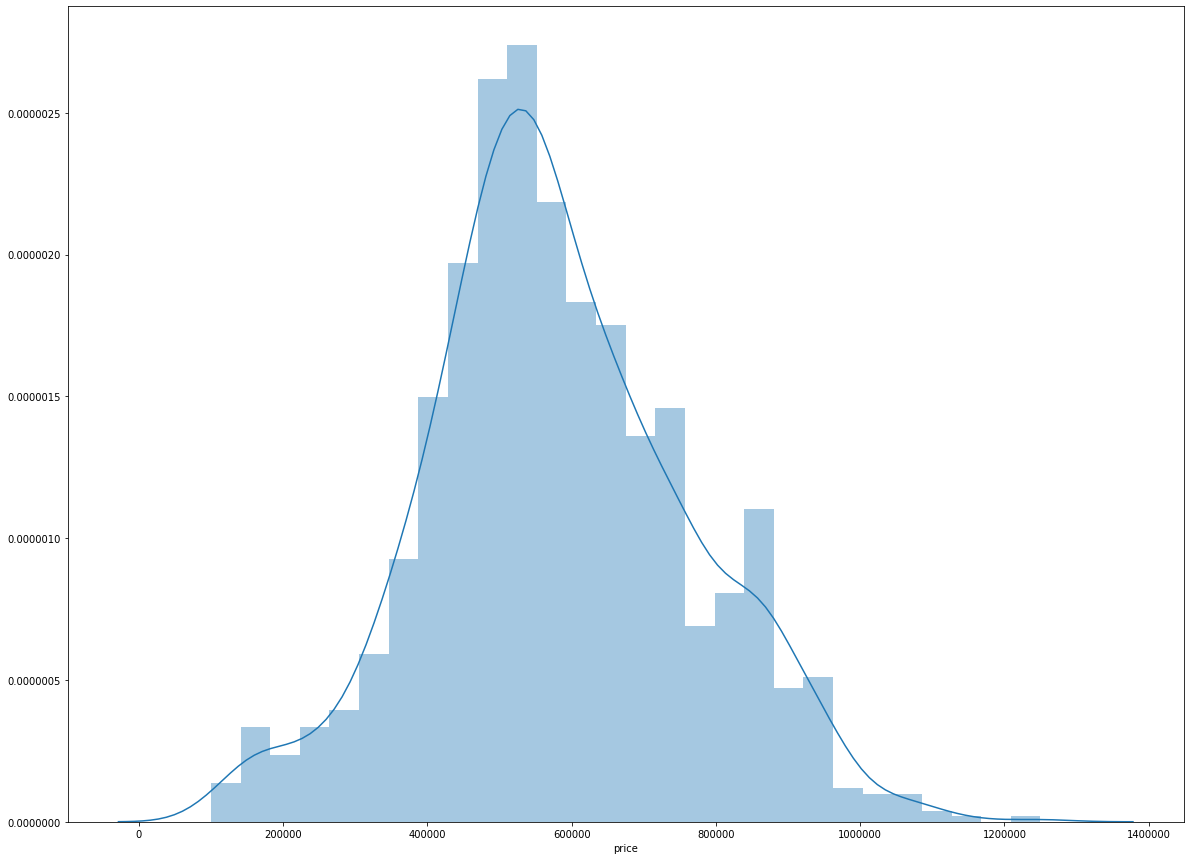

In [227]:
sns.distplot(auto_data['price'])

In [228]:
#skewness and kurtosis
print("Skewness: %f" % auto_data['price'].skew())
print("Kurtosis: %f" % auto_data['price'].kurt())

Skewness: 0.188846
Kurtosis: 0.094796


In [229]:
# Распределение цены близко к нормальному

In [231]:
df = auto_data

In [232]:
df.shape

(1236, 7)

In [233]:
df = df.drop_duplicates()

In [234]:
df.shape

(1233, 7)

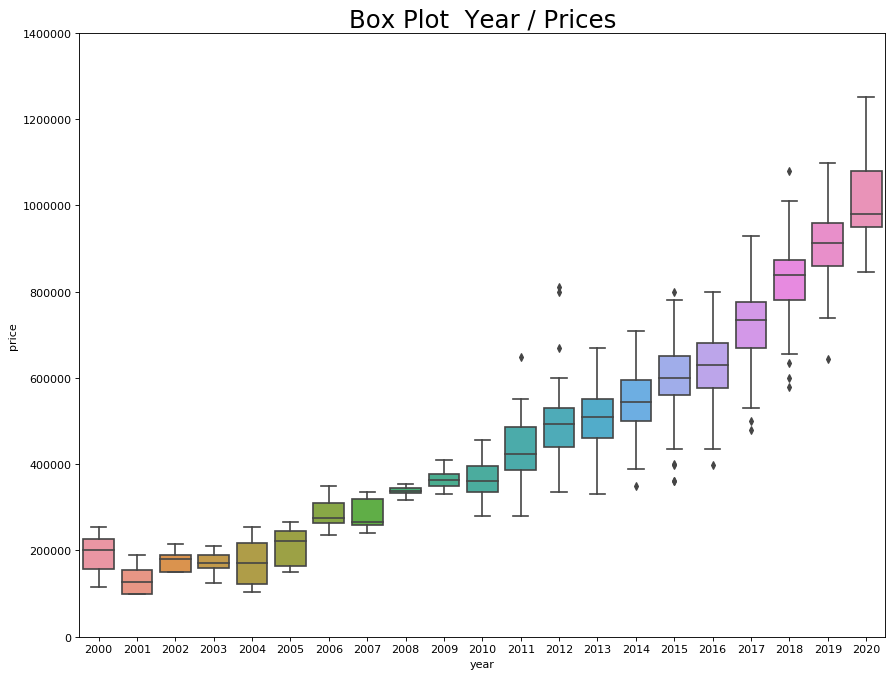

In [235]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1400000)
plt.show()

In [236]:
# удалим выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

In [237]:
df.shape

(1215, 7)

In [238]:
# у нас удалилось 18 позиций

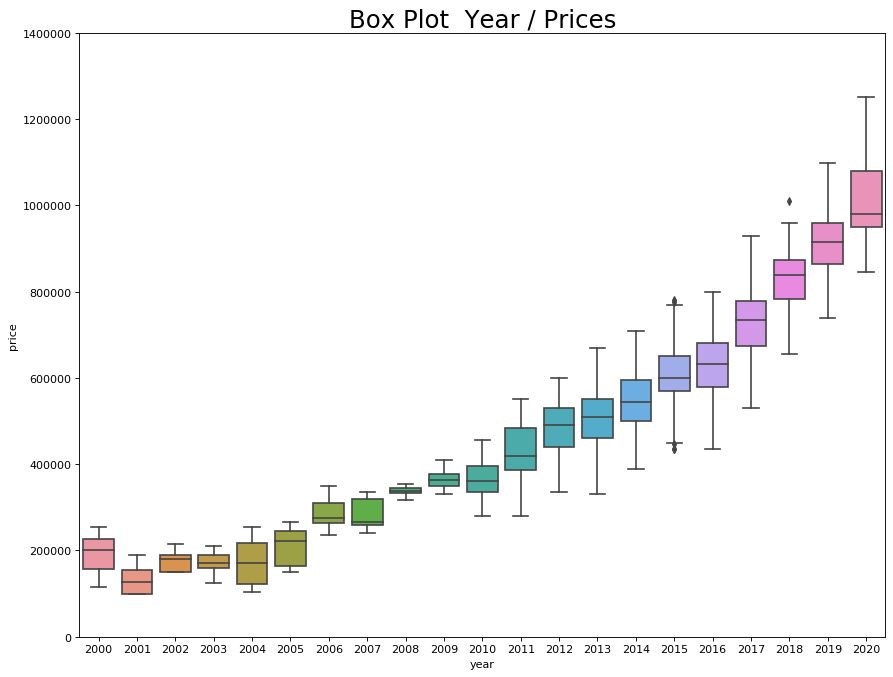

In [239]:
# посмотрим еще раз на график цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1400000)
plt.show()

In [240]:
# удалим еще раз выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

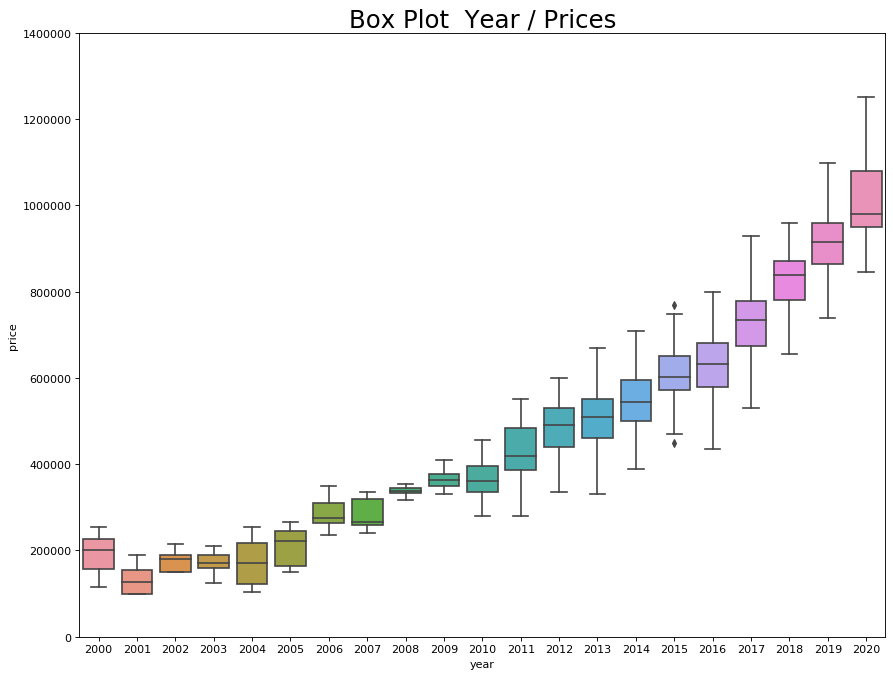

In [241]:
# посмотрим еще раз на график цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1400000)
plt.show()

## Алгоритм CatBoost

In [242]:
X = df.drop(['price'], axis=1)
y = df['price']

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
categorical_features_indices = np.where(X.dtypes == np.object)[0]

model = CatBoostRegressor()
parameters = {'depth'         : [3,4,5],
              'learning_rate' : [0.03,0.05, 0.1],
              'iterations'    : [800],
              'subsample'     : [0.3, 0.5, 1]
            }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train, cat_features=categorical_features_indices)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
    grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
    grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
    grid.best_params_)
    
print("\n ========================================================")

0:	learn: 176611.6101101	total: 3.23ms	remaining: 2.58s
1:	learn: 172794.2680396	total: 6.02ms	remaining: 2.4s
2:	learn: 168894.5116878	total: 8.59ms	remaining: 2.28s
3:	learn: 165017.4514442	total: 10.6ms	remaining: 2.12s
4:	learn: 161270.3617938	total: 12.5ms	remaining: 1.99s
5:	learn: 157561.3582898	total: 14.3ms	remaining: 1.9s
6:	learn: 154201.6763334	total: 16.3ms	remaining: 1.84s
7:	learn: 150833.2004392	total: 18.2ms	remaining: 1.8s
8:	learn: 147480.1328330	total: 22ms	remaining: 1.93s
9:	learn: 144215.8291999	total: 24.5ms	remaining: 1.93s
10:	learn: 141192.1809687	total: 26.3ms	remaining: 1.89s
11:	learn: 138127.8017816	total: 27.8ms	remaining: 1.83s
12:	learn: 135239.7634858	total: 29.5ms	remaining: 1.78s
13:	learn: 132534.1480565	total: 31.7ms	remaining: 1.78s
14:	learn: 129676.7413081	total: 33.6ms	remaining: 1.76s
15:	learn: 126922.4655307	total: 36ms	remaining: 1.76s
16:	learn: 124397.0745411	total: 36.9ms	remaining: 1.7s
17:	learn: 121991.6133020	total: 39.2ms	remaining

174:	learn: 46205.3524872	total: 301ms	remaining: 1.08s
175:	learn: 46185.9200028	total: 304ms	remaining: 1.08s
176:	learn: 46161.9430556	total: 307ms	remaining: 1.08s
177:	learn: 46137.8189131	total: 308ms	remaining: 1.08s
178:	learn: 46116.0764491	total: 310ms	remaining: 1.07s
179:	learn: 46097.5099710	total: 311ms	remaining: 1.07s
180:	learn: 46069.8264860	total: 313ms	remaining: 1.07s
181:	learn: 46058.3772951	total: 314ms	remaining: 1.06s
182:	learn: 46040.7177864	total: 314ms	remaining: 1.06s
183:	learn: 46003.3892481	total: 316ms	remaining: 1.06s
184:	learn: 45976.5590337	total: 317ms	remaining: 1.05s
185:	learn: 45953.0114873	total: 319ms	remaining: 1.05s
186:	learn: 45934.1666944	total: 320ms	remaining: 1.05s
187:	learn: 45907.6414238	total: 322ms	remaining: 1.05s
188:	learn: 45887.0311697	total: 323ms	remaining: 1.04s
189:	learn: 45871.9456448	total: 325ms	remaining: 1.04s
190:	learn: 45848.8934935	total: 328ms	remaining: 1.04s
191:	learn: 45815.5923534	total: 329ms	remaining

441:	learn: 43069.9858734	total: 592ms	remaining: 479ms
442:	learn: 43053.0806803	total: 594ms	remaining: 479ms
443:	learn: 43045.4394772	total: 595ms	remaining: 477ms
444:	learn: 43036.1501471	total: 595ms	remaining: 475ms
445:	learn: 43032.1372343	total: 596ms	remaining: 473ms
446:	learn: 42998.7268101	total: 597ms	remaining: 472ms
447:	learn: 42998.3298230	total: 598ms	remaining: 470ms
448:	learn: 42994.4167486	total: 599ms	remaining: 468ms
449:	learn: 42994.2552109	total: 599ms	remaining: 466ms
450:	learn: 42993.8692583	total: 600ms	remaining: 464ms
451:	learn: 42993.0210043	total: 600ms	remaining: 462ms
452:	learn: 42992.8720062	total: 601ms	remaining: 460ms
453:	learn: 42974.1633253	total: 604ms	remaining: 460ms
454:	learn: 42971.0721442	total: 604ms	remaining: 458ms
455:	learn: 42955.2750716	total: 606ms	remaining: 457ms
456:	learn: 42939.2493375	total: 607ms	remaining: 456ms
457:	learn: 42932.0568247	total: 608ms	remaining: 454ms
458:	learn: 42923.1855183	total: 608ms	remaining

727:	learn: 41132.4172980	total: 877ms	remaining: 86.8ms
728:	learn: 41127.1531317	total: 878ms	remaining: 85.5ms
729:	learn: 41119.9606950	total: 879ms	remaining: 84.3ms
730:	learn: 41114.1441256	total: 879ms	remaining: 83ms
731:	learn: 41109.9064625	total: 880ms	remaining: 81.7ms
732:	learn: 41108.3500388	total: 881ms	remaining: 80.5ms
733:	learn: 41105.8694179	total: 882ms	remaining: 79.3ms
734:	learn: 41102.1604307	total: 884ms	remaining: 78.2ms
735:	learn: 41096.1305532	total: 886ms	remaining: 77ms
736:	learn: 41094.3910432	total: 886ms	remaining: 75.8ms
737:	learn: 41090.6860124	total: 887ms	remaining: 74.6ms
738:	learn: 41081.0636245	total: 890ms	remaining: 73.5ms
739:	learn: 41075.3547869	total: 893ms	remaining: 72.4ms
740:	learn: 41072.3489948	total: 894ms	remaining: 71.2ms
741:	learn: 41070.2994566	total: 895ms	remaining: 70ms
742:	learn: 41068.7849283	total: 896ms	remaining: 68.7ms
743:	learn: 41063.2757220	total: 898ms	remaining: 67.6ms
744:	learn: 41058.7787530	total: 899m

In [244]:
model = CatBoostRegressor(iterations=800,
                          learning_rate=0.03,
                          subsample=1,
                          depth=4)

In [245]:
# Fit model
model.fit(X_train, y_train, cat_features=categorical_features_indices)

0:	learn: 176611.6101101	total: 3.73ms	remaining: 2.98s
1:	learn: 172794.2680396	total: 8.09ms	remaining: 3.23s
2:	learn: 168894.5116878	total: 10.8ms	remaining: 2.87s
3:	learn: 165017.4514442	total: 13.1ms	remaining: 2.61s
4:	learn: 161270.3617938	total: 15.4ms	remaining: 2.45s
5:	learn: 157561.3582898	total: 18.4ms	remaining: 2.43s
6:	learn: 154201.6763334	total: 20.6ms	remaining: 2.34s
7:	learn: 150833.2004392	total: 22.7ms	remaining: 2.25s
8:	learn: 147480.1328330	total: 26.8ms	remaining: 2.36s
9:	learn: 144215.8291999	total: 29.1ms	remaining: 2.3s
10:	learn: 141192.1809687	total: 31.7ms	remaining: 2.27s
11:	learn: 138127.8017816	total: 33.8ms	remaining: 2.22s
12:	learn: 135239.7634858	total: 35.9ms	remaining: 2.17s
13:	learn: 132534.1480565	total: 39.3ms	remaining: 2.2s
14:	learn: 129676.7413081	total: 41.4ms	remaining: 2.17s
15:	learn: 126922.4655307	total: 44.1ms	remaining: 2.16s
16:	learn: 124397.0745411	total: 45ms	remaining: 2.07s
17:	learn: 121991.6133020	total: 47ms	remaini

232:	learn: 45206.1048845	total: 453ms	remaining: 1.1s
233:	learn: 45193.9625303	total: 455ms	remaining: 1.1s
234:	learn: 45175.3224423	total: 457ms	remaining: 1.1s
235:	learn: 45161.1658699	total: 459ms	remaining: 1.1s
236:	learn: 45146.5636253	total: 461ms	remaining: 1.09s
237:	learn: 45122.5481727	total: 463ms	remaining: 1.09s
238:	learn: 45112.2802008	total: 464ms	remaining: 1.09s
239:	learn: 45107.3921018	total: 465ms	remaining: 1.08s
240:	learn: 45079.3153679	total: 468ms	remaining: 1.08s
241:	learn: 45065.6825650	total: 469ms	remaining: 1.08s
242:	learn: 45053.4925238	total: 471ms	remaining: 1.08s
243:	learn: 45030.9455992	total: 473ms	remaining: 1.08s
244:	learn: 45020.2293272	total: 473ms	remaining: 1.07s
245:	learn: 44989.6787446	total: 481ms	remaining: 1.08s
246:	learn: 44984.9606502	total: 484ms	remaining: 1.08s
247:	learn: 44983.3866594	total: 485ms	remaining: 1.08s
248:	learn: 44983.3754393	total: 485ms	remaining: 1.07s
249:	learn: 44972.3572722	total: 486ms	remaining: 1.

483:	learn: 42744.3133405	total: 738ms	remaining: 482ms
484:	learn: 42727.6437994	total: 739ms	remaining: 480ms
485:	learn: 42719.9299591	total: 740ms	remaining: 478ms
486:	learn: 42719.7862241	total: 741ms	remaining: 476ms
487:	learn: 42716.0019985	total: 741ms	remaining: 474ms
488:	learn: 42687.5187485	total: 742ms	remaining: 472ms
489:	learn: 42672.0916711	total: 743ms	remaining: 470ms
490:	learn: 42669.4191671	total: 743ms	remaining: 468ms
491:	learn: 42667.2742065	total: 745ms	remaining: 467ms
492:	learn: 42665.4668673	total: 747ms	remaining: 465ms
493:	learn: 42665.3328291	total: 748ms	remaining: 463ms
494:	learn: 42657.9791252	total: 748ms	remaining: 461ms
495:	learn: 42657.1078180	total: 749ms	remaining: 459ms
496:	learn: 42646.3604120	total: 750ms	remaining: 457ms
497:	learn: 42640.9288091	total: 751ms	remaining: 455ms
498:	learn: 42638.7688324	total: 752ms	remaining: 453ms
499:	learn: 42636.0445484	total: 752ms	remaining: 451ms
500:	learn: 42632.3336525	total: 753ms	remaining

752:	learn: 41043.4662534	total: 1.03s	remaining: 64.1ms
753:	learn: 41029.1845652	total: 1.03s	remaining: 62.8ms
754:	learn: 41027.1995237	total: 1.03s	remaining: 61.4ms
755:	learn: 41024.7686564	total: 1.03s	remaining: 60ms
756:	learn: 41018.6184647	total: 1.03s	remaining: 58.6ms
757:	learn: 41013.4058610	total: 1.03s	remaining: 57.2ms
758:	learn: 41013.3584533	total: 1.03s	remaining: 55.8ms
759:	learn: 41002.4114422	total: 1.03s	remaining: 54.4ms
760:	learn: 41002.3668939	total: 1.03s	remaining: 53ms
761:	learn: 41002.3248470	total: 1.03s	remaining: 51.6ms
762:	learn: 40999.9330541	total: 1.03s	remaining: 50.2ms
763:	learn: 40996.6716534	total: 1.05s	remaining: 49.3ms
764:	learn: 40990.7209937	total: 1.05s	remaining: 47.9ms
765:	learn: 40988.9966048	total: 1.05s	remaining: 46.5ms
766:	learn: 40984.4955833	total: 1.05s	remaining: 45.1ms
767:	learn: 40984.4499872	total: 1.05s	remaining: 43.8ms
768:	learn: 40982.6057243	total: 1.05s	remaining: 42.4ms
769:	learn: 40963.2835781	total: 1.

In [246]:
# Get predictions
preds = model.predict(X_test)

In [247]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 51881.919168


In [252]:
# создадим фрейм под именем drom_ru_set

drom_ru_set = df

## Поработаем с данными с avito.ru

In [303]:
# auto_data = pd.read_excel('C:\\Users\\Alexander\\PycharmProjects\\Dasha_PARSING\\venv\\Kia_Rio_data_set_Avito.xls', index_col=None, header=None)

auto_data = pd.read_excel('C:\\Users\\user1174\\Downloads\\AutoRU_project\\Kia_Rio_data_set_Avito.xls', index_col=None, header=None)

In [304]:
auto_data.columns = [ 'model', 'year', 'km_age', 'body_type',
                      'engine_power', 'transmission','owners_count', 
                      'condition', 'price', 'link' ]

In [305]:
# Удалим столбец с сылками, он не нужен

auto_data.drop(['link'], axis='columns', inplace=True)

In [306]:
auto_data.shape

(4707, 9)

In [307]:
# Удалим все строки, где отсутствуют данные хотя бы в одном столбце

auto_data = auto_data.loc[auto_data['model'] != 'None']
auto_data = auto_data.loc[auto_data['year'] != 'None']
auto_data = auto_data.loc[auto_data['km_age'] != 'None']
auto_data = auto_data.loc[auto_data['engine_power'] != 'None']
auto_data = auto_data.loc[auto_data['transmission'] != 'None']
auto_data = auto_data.loc[auto_data['owners_count'] != 'None']
auto_data = auto_data.loc[auto_data['price'] != 'None']

In [308]:
auto_data.shape

(4328, 9)

In [309]:
auto_data['transmission'].unique()

array(['автомат', 'механика'], dtype=object)

In [310]:
auto_data['transmission'] = auto_data['transmission'].str.replace('автомат','автоматическая')
auto_data['transmission'] = auto_data['transmission'].str.replace('механика','механическая')

In [311]:
auto_data['condition'].unique()

array(['не битый', 'битый'], dtype=object)

In [312]:
auto_data.groupby('condition').count()['model']

condition
битый        108
не битый    4220
Name: model, dtype: int64

In [313]:
# итого 108 битых автомобилей. Удалим их

auto_data = auto_data.loc[auto_data['condition'] != 'битый']

In [314]:
# Теперь можно удалить столбец 'condition'

auto_data.drop(['condition'], axis='columns', inplace=True)

In [315]:
auto_data['model'].unique()

array(['II рестайлинг', 'II', 'III', 'IV', 'III рестайлинг',
       'I рестайлинг', 'I', 'IV рестайлинг'], dtype=object)

In [316]:
auto_data['model'] = 'Kia Rio ' + auto_data['model']

In [317]:
auto_data['model'].unique()

array(['Kia Rio II рестайлинг', 'Kia Rio II', 'Kia Rio III', 'Kia Rio IV',
       'Kia Rio III рестайлинг', 'Kia Rio I рестайлинг', 'Kia Rio I',
       'Kia Rio IV рестайлинг'], dtype=object)

In [318]:
auto_data['owners_count'].unique()

array(['3', '2', '4+', '1'], dtype=object)

In [319]:
auto_data['owners_count'] = auto_data['owners_count'].str.replace('3','3 или более')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('1','1 владелец')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('2','2 владельца')
auto_data['owners_count'] = auto_data['owners_count'].str.replace('4+','3 или более')

In [320]:
auto_data['owners_count'].unique()

array(['3 или более', '2 владельца', '3 или более+', '1 владелец'],
      dtype=object)

In [321]:
auto_data['owners_count'] = auto_data['owners_count'].str.replace('+','')

In [322]:
auto_data['owners_count'].unique()

array(['3 или более', '2 владельца', '1 владелец'], dtype=object)

In [323]:
auto_data.drop(['body_type'], axis='columns', inplace=True)

In [324]:
# преобразуем типы данных в столбцах

auto_data['price'] = auto_data['price'].astype('int')
auto_data['year'] = auto_data['year'].astype('int')
auto_data['km_age'] = auto_data['km_age'].astype('int')
auto_data['engine_power'] = auto_data['engine_power'].astype('int')

In [325]:
auto_data.shape

(4220, 7)

In [326]:
# удалим дубликаты

auto_data = auto_data.drop_duplicates()

In [327]:
# удалим новые автомобили (с очень маленьким пробегом)

auto_data = auto_data.loc[auto_data['km_age'] > 150]

In [328]:
auto_data.shape

(4023, 7)

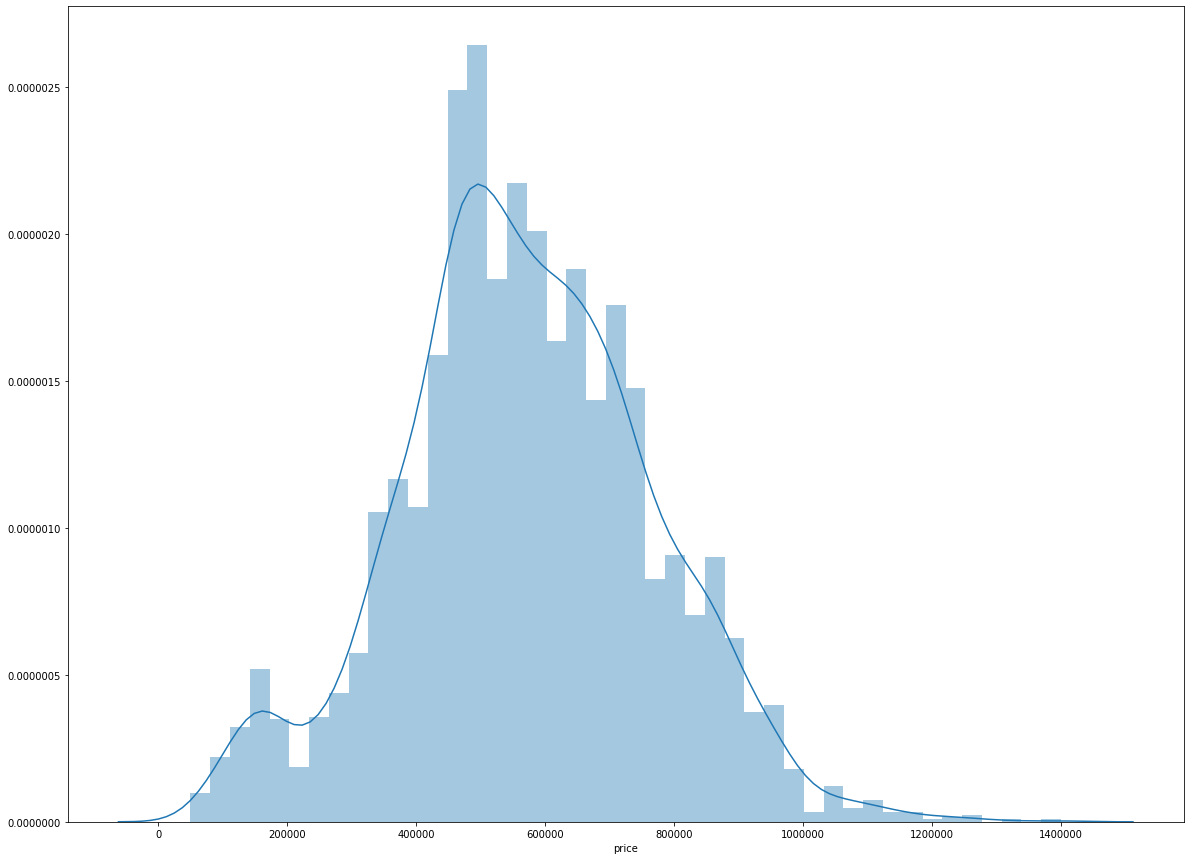

In [329]:
sns.distplot(auto_data['price'])

In [330]:
#skewness and kurtosis
print("Skewness: %f" % auto_data['price'].skew())
print("Kurtosis: %f" % auto_data['price'].kurt())

Skewness: 0.073480
Kurtosis: 0.162858


## Графики

In [331]:
df = auto_data

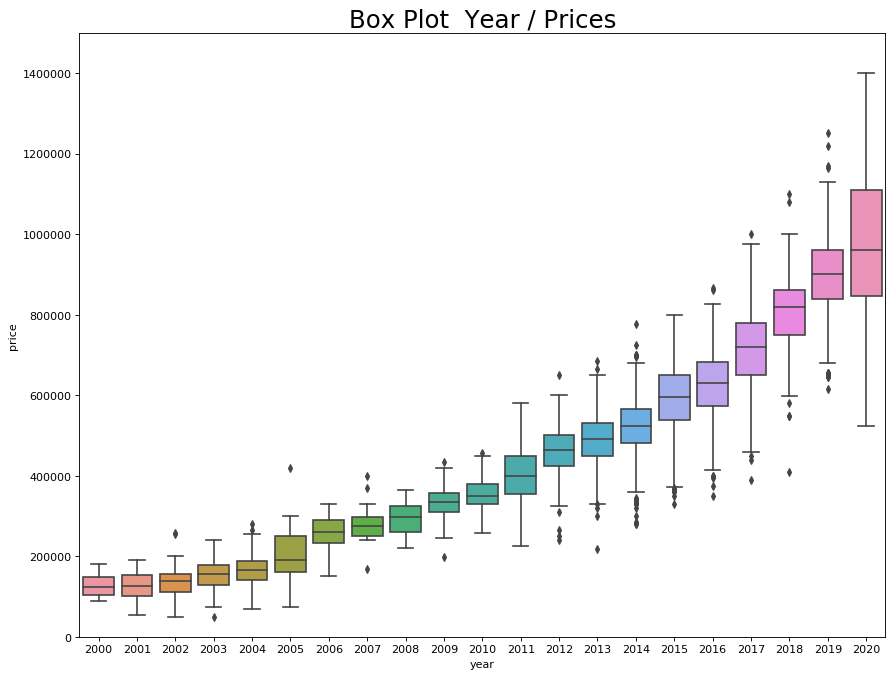

In [332]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

In [333]:
df.shape

(4023, 7)

In [334]:
# удалим выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

In [335]:
df.shape

(3949, 7)

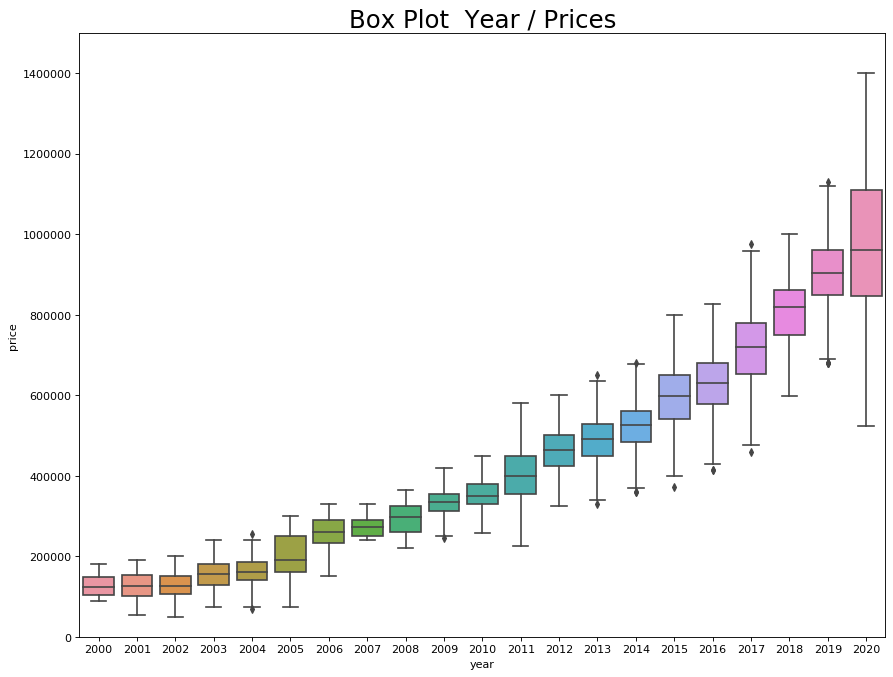

In [336]:
# посмотрим еще раз на график цены по годам

plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

## Алгоритм CatBoost

In [337]:
X = df.drop(['price'], axis=1)
y = df['price']

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
categorical_features_indices = np.where(X.dtypes == np.object)[0]

model = CatBoostRegressor()
parameters = {'depth'         : [3,4,5],
              'learning_rate' : [0.03,0.05, 0.1],
              'iterations'    : [800],
              'subsample'     : [0.3, 0.5, 1]
            }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train, cat_features=categorical_features_indices)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
    grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
    grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
    grid.best_params_)
    
print("\n ========================================================")

0:	learn: 190242.2268721	total: 3.25ms	remaining: 2.59s
1:	learn: 186102.0501855	total: 6.41ms	remaining: 2.56s
2:	learn: 182201.4554453	total: 10ms	remaining: 2.67s
3:	learn: 178603.7164458	total: 12.5ms	remaining: 2.49s
4:	learn: 174899.1476743	total: 13.4ms	remaining: 2.13s
5:	learn: 171323.3845788	total: 15.9ms	remaining: 2.11s
6:	learn: 167849.5067891	total: 18.5ms	remaining: 2.09s
7:	learn: 164285.7152617	total: 20.7ms	remaining: 2.05s
8:	learn: 161268.6940815	total: 22.9ms	remaining: 2.01s
9:	learn: 158121.0206278	total: 24.8ms	remaining: 1.96s
10:	learn: 154908.5787815	total: 26.3ms	remaining: 1.88s
11:	learn: 151806.5019810	total: 28.5ms	remaining: 1.87s
12:	learn: 148960.1989031	total: 30.2ms	remaining: 1.83s
13:	learn: 146096.3900204	total: 32.3ms	remaining: 1.81s
14:	learn: 143284.0305810	total: 34ms	remaining: 1.78s
15:	learn: 140541.4058989	total: 36.4ms	remaining: 1.78s
16:	learn: 137796.4591744	total: 37.9ms	remaining: 1.75s
17:	learn: 135221.5029865	total: 39.9ms	remai

167:	learn: 55162.6095748	total: 315ms	remaining: 1.19s
168:	learn: 55108.8997723	total: 318ms	remaining: 1.19s
169:	learn: 55080.1766651	total: 319ms	remaining: 1.18s
170:	learn: 55046.4373764	total: 320ms	remaining: 1.18s
171:	learn: 54996.3982222	total: 322ms	remaining: 1.17s
172:	learn: 54959.5095446	total: 323ms	remaining: 1.17s
173:	learn: 54926.6140221	total: 325ms	remaining: 1.17s
174:	learn: 54868.0328072	total: 327ms	remaining: 1.17s
175:	learn: 54834.8813000	total: 329ms	remaining: 1.17s
176:	learn: 54798.5554051	total: 332ms	remaining: 1.17s
177:	learn: 54776.8100868	total: 335ms	remaining: 1.17s
178:	learn: 54722.9148755	total: 337ms	remaining: 1.17s
179:	learn: 54676.3966753	total: 339ms	remaining: 1.17s
180:	learn: 54653.6826442	total: 341ms	remaining: 1.16s
181:	learn: 54612.6269740	total: 343ms	remaining: 1.16s
182:	learn: 54576.7330368	total: 345ms	remaining: 1.16s
183:	learn: 54533.7488651	total: 348ms	remaining: 1.16s
184:	learn: 54515.3632682	total: 349ms	remaining

316:	learn: 52175.1541315	total: 624ms	remaining: 951ms
317:	learn: 52162.7570830	total: 625ms	remaining: 948ms
318:	learn: 52146.0091107	total: 628ms	remaining: 948ms
319:	learn: 52131.4775629	total: 630ms	remaining: 944ms
320:	learn: 52125.9950367	total: 631ms	remaining: 942ms
321:	learn: 52115.4341678	total: 634ms	remaining: 941ms
322:	learn: 52103.7048470	total: 635ms	remaining: 937ms
323:	learn: 52099.9516235	total: 637ms	remaining: 936ms
324:	learn: 52094.3319527	total: 639ms	remaining: 934ms
325:	learn: 52083.7254684	total: 640ms	remaining: 931ms
326:	learn: 52070.5383210	total: 643ms	remaining: 930ms
327:	learn: 52064.2051675	total: 645ms	remaining: 928ms
328:	learn: 52053.9263485	total: 648ms	remaining: 927ms
329:	learn: 52043.0727432	total: 651ms	remaining: 927ms
330:	learn: 52031.0031289	total: 653ms	remaining: 926ms
331:	learn: 52022.4992275	total: 655ms	remaining: 923ms
332:	learn: 52010.1477019	total: 656ms	remaining: 920ms
333:	learn: 52004.7171068	total: 657ms	remaining

485:	learn: 50923.7032088	total: 927ms	remaining: 599ms
486:	learn: 50917.7029659	total: 929ms	remaining: 597ms
487:	learn: 50914.5788849	total: 931ms	remaining: 595ms
488:	learn: 50913.7434946	total: 933ms	remaining: 593ms
489:	learn: 50913.6308647	total: 934ms	remaining: 591ms
490:	learn: 50904.3340658	total: 938ms	remaining: 590ms
491:	learn: 50898.0679553	total: 939ms	remaining: 588ms
492:	learn: 50894.4914601	total: 941ms	remaining: 586ms
493:	learn: 50889.1598645	total: 942ms	remaining: 583ms
494:	learn: 50885.5876108	total: 944ms	remaining: 581ms
495:	learn: 50875.1360425	total: 945ms	remaining: 579ms
496:	learn: 50867.4320803	total: 946ms	remaining: 577ms
497:	learn: 50861.9650814	total: 948ms	remaining: 575ms
498:	learn: 50856.3303640	total: 951ms	remaining: 573ms
499:	learn: 50854.7303904	total: 952ms	remaining: 571ms
500:	learn: 50850.5191206	total: 953ms	remaining: 569ms
501:	learn: 50846.5530320	total: 954ms	remaining: 566ms
502:	learn: 50843.0298833	total: 958ms	remaining

644:	learn: 50304.4343128	total: 1.24s	remaining: 297ms
645:	learn: 50302.3369360	total: 1.24s	remaining: 295ms
646:	learn: 50297.9200035	total: 1.24s	remaining: 293ms
647:	learn: 50293.5839618	total: 1.24s	remaining: 291ms
648:	learn: 50289.4570958	total: 1.24s	remaining: 290ms
649:	learn: 50285.7753808	total: 1.25s	remaining: 288ms
650:	learn: 50282.9435128	total: 1.25s	remaining: 286ms
651:	learn: 50281.6991494	total: 1.25s	remaining: 284ms
652:	learn: 50277.3707118	total: 1.25s	remaining: 282ms
653:	learn: 50269.6133911	total: 1.25s	remaining: 280ms
654:	learn: 50269.2026483	total: 1.26s	remaining: 278ms
655:	learn: 50263.6642203	total: 1.26s	remaining: 276ms
656:	learn: 50260.7493565	total: 1.26s	remaining: 274ms
657:	learn: 50254.8139283	total: 1.26s	remaining: 273ms
658:	learn: 50253.0073813	total: 1.27s	remaining: 271ms
659:	learn: 50250.8434588	total: 1.27s	remaining: 269ms
660:	learn: 50247.3008477	total: 1.27s	remaining: 267ms
661:	learn: 50246.1010047	total: 1.27s	remaining

In [287]:
model = CatBoostRegressor(iterations=800,
                          learning_rate=0.03,
                          subsample=0.5,
                          depth=3)

In [288]:
# Fit model
model.fit(X_train, y_train, cat_features=categorical_features_indices)

0:	learn: 190242.2268721	total: 4.75ms	remaining: 3.79s
1:	learn: 186102.0501855	total: 8.46ms	remaining: 3.38s
2:	learn: 182201.4554453	total: 12ms	remaining: 3.18s
3:	learn: 178603.7164458	total: 14.1ms	remaining: 2.81s
4:	learn: 174899.1476743	total: 15.1ms	remaining: 2.4s
5:	learn: 171323.3845788	total: 17.5ms	remaining: 2.32s
6:	learn: 167849.5067891	total: 19.6ms	remaining: 2.22s
7:	learn: 164285.7152617	total: 26.5ms	remaining: 2.63s
8:	learn: 161268.6940815	total: 30.5ms	remaining: 2.68s
9:	learn: 158121.0206278	total: 33.1ms	remaining: 2.62s
10:	learn: 154908.5787815	total: 39ms	remaining: 2.8s
11:	learn: 151806.5019810	total: 41.6ms	remaining: 2.73s
12:	learn: 148960.1989031	total: 43.4ms	remaining: 2.63s
13:	learn: 146096.3900204	total: 45.2ms	remaining: 2.54s
14:	learn: 143284.0305810	total: 47.4ms	remaining: 2.48s
15:	learn: 140541.4058989	total: 49.9ms	remaining: 2.45s
16:	learn: 137796.4591744	total: 51.8ms	remaining: 2.38s
17:	learn: 135221.5029865	total: 54.3ms	remaini

187:	learn: 54441.3845326	total: 511ms	remaining: 1.66s
188:	learn: 54411.4111333	total: 513ms	remaining: 1.66s
189:	learn: 54391.4719292	total: 515ms	remaining: 1.65s
190:	learn: 54367.8993721	total: 517ms	remaining: 1.65s
191:	learn: 54332.6124242	total: 519ms	remaining: 1.64s
192:	learn: 54305.5483439	total: 521ms	remaining: 1.64s
193:	learn: 54284.1804401	total: 523ms	remaining: 1.63s
194:	learn: 54263.0781039	total: 525ms	remaining: 1.63s
195:	learn: 54243.4755216	total: 526ms	remaining: 1.62s
196:	learn: 54224.3937630	total: 529ms	remaining: 1.62s
197:	learn: 54195.4817912	total: 531ms	remaining: 1.61s
198:	learn: 54174.6778084	total: 532ms	remaining: 1.61s
199:	learn: 54154.1651662	total: 533ms	remaining: 1.6s
200:	learn: 54136.4196636	total: 534ms	remaining: 1.59s
201:	learn: 54112.1797805	total: 537ms	remaining: 1.59s
202:	learn: 54093.4685361	total: 539ms	remaining: 1.58s
203:	learn: 54079.1912290	total: 540ms	remaining: 1.58s
204:	learn: 54051.1234011	total: 546ms	remaining:

366:	learn: 51673.9648913	total: 977ms	remaining: 1.15s
367:	learn: 51666.9637307	total: 979ms	remaining: 1.15s
368:	learn: 51663.4574890	total: 981ms	remaining: 1.15s
369:	learn: 51650.4059632	total: 982ms	remaining: 1.14s
370:	learn: 51643.0061972	total: 984ms	remaining: 1.14s
371:	learn: 51633.8398257	total: 986ms	remaining: 1.13s
372:	learn: 51621.0474882	total: 987ms	remaining: 1.13s
373:	learn: 51613.4489119	total: 990ms	remaining: 1.13s
374:	learn: 51603.3002415	total: 993ms	remaining: 1.13s
375:	learn: 51591.5522148	total: 994ms	remaining: 1.12s
376:	learn: 51580.0586763	total: 997ms	remaining: 1.12s
377:	learn: 51575.0363211	total: 998ms	remaining: 1.11s
378:	learn: 51566.3046715	total: 1s	remaining: 1.11s
379:	learn: 51559.2528877	total: 1s	remaining: 1.11s
380:	learn: 51546.7919863	total: 1s	remaining: 1.1s
381:	learn: 51538.7099981	total: 1.01s	remaining: 1.1s
382:	learn: 51532.7449031	total: 1.01s	remaining: 1.1s
383:	learn: 51525.2771854	total: 1.01s	remaining: 1.1s
384:	

540:	learn: 50687.4168946	total: 1.28s	remaining: 613ms
541:	learn: 50686.1084174	total: 1.28s	remaining: 611ms
542:	learn: 50683.4565589	total: 1.29s	remaining: 609ms
543:	learn: 50679.6263964	total: 1.29s	remaining: 607ms
544:	learn: 50674.9790013	total: 1.29s	remaining: 604ms
545:	learn: 50672.4468838	total: 1.29s	remaining: 602ms
546:	learn: 50669.2096862	total: 1.3s	remaining: 600ms
547:	learn: 50663.8063530	total: 1.3s	remaining: 598ms
548:	learn: 50658.0356168	total: 1.3s	remaining: 595ms
549:	learn: 50653.0713830	total: 1.3s	remaining: 593ms
550:	learn: 50652.0902552	total: 1.31s	remaining: 590ms
551:	learn: 50648.1994978	total: 1.31s	remaining: 589ms
552:	learn: 50643.2109844	total: 1.31s	remaining: 587ms
553:	learn: 50641.0608566	total: 1.32s	remaining: 585ms
554:	learn: 50635.4083484	total: 1.32s	remaining: 583ms
555:	learn: 50634.7752211	total: 1.32s	remaining: 580ms
556:	learn: 50629.3674455	total: 1.32s	remaining: 577ms
557:	learn: 50627.7317401	total: 1.32s	remaining: 57

750:	learn: 50017.2371327	total: 1.74s	remaining: 114ms
751:	learn: 50015.8274699	total: 1.75s	remaining: 112ms
752:	learn: 50014.4020043	total: 1.75s	remaining: 109ms
753:	learn: 50013.0882316	total: 1.75s	remaining: 107ms
754:	learn: 50011.5379339	total: 1.75s	remaining: 105ms
755:	learn: 50009.1084681	total: 1.76s	remaining: 102ms
756:	learn: 50008.7785676	total: 1.76s	remaining: 99.8ms
757:	learn: 50002.5972823	total: 1.76s	remaining: 97.4ms
758:	learn: 50001.7112954	total: 1.76s	remaining: 95.1ms
759:	learn: 50001.0248704	total: 1.76s	remaining: 92.8ms
760:	learn: 49997.1522761	total: 1.76s	remaining: 90.5ms
761:	learn: 49995.9781363	total: 1.77s	remaining: 88.1ms
762:	learn: 49992.1055845	total: 1.77s	remaining: 85.8ms
763:	learn: 49985.9175854	total: 1.77s	remaining: 83.4ms
764:	learn: 49984.9708178	total: 1.77s	remaining: 81.1ms
765:	learn: 49981.1503346	total: 1.77s	remaining: 78.8ms
766:	learn: 49980.8588711	total: 1.77s	remaining: 76.4ms
767:	learn: 49977.5528072	total: 1.78

In [289]:
# Get predictions
preds = model.predict(X_test)

In [290]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 51247.223782


In [338]:
# создадим фрейм под именем avito_ru_set

avito_ru_set = df

In [339]:
auto_ru_set

,model,year,km_age,engine_power,transmission,owners_count,price
0,Kia Rio IV,2017,57000,123,автоматическая,1 владелец,770000
1,Kia Rio III Рестайлинг,2016,19086,123,автоматическая,1 владелец,709000
2,Kia Rio III Рестайлинг,2017,105860,123,механическая,1 владелец,695000
3,Kia Rio III,2015,240000,107,механическая,3 или более,350000
5,Kia Rio III,2013,115000,107,механическая,2 владельца,410000
...,...,...,...,...,...,...,...
1216,Kia Rio III Рестайлинг,2015,170000,123,механическая,3 или более,510000
1217,Kia Rio III Рестайлинг,2016,250000,123,механическая,2 владельца,599000
1218,Kia Rio III,2014,228000,123,механическая,2 владельца,430000
1219,Kia Rio III,2015,188600,107,механическая,2 владельца,460000


In [340]:
drom_ru_set

,model,year,km_age,engine_power,transmission,owners_count,price
0,Kia Rio II рестайлинг,2011,125589,95,автоматическая,1 владелец,364000
1,Kia Rio III,2012,149829,107,механическая,3 или более,375000
3,Kia Rio III рестайлинг,2016,70000,107,автоматическая,2 владельца,597000
8,Kia Rio III рестайлинг,2016,101000,107,автоматическая,1 владелец,640000
10,Kia Rio IV,2017,63000,123,механическая,1 владелец,759000
...,...,...,...,...,...,...,...
1990,Kia Rio II рестайлинг,2010,150000,95,механическая,3 или более,340000
1991,Kia Rio III,2012,144000,123,автоматическая,3 или более,479000
1993,Kia Rio III,2012,144000,123,механическая,2 владельца,460000
1996,Kia Rio III рестайлинг,2016,29000,123,механическая,3 или более,545000


In [341]:
avito_ru_set

,model,year,km_age,engine_power,transmission,owners_count,price
0,Kia Rio II рестайлинг,2009,169700,97,автоматическая,3 или более,340000
1,Kia Rio II,2007,290000,97,автоматическая,2 владельца,290000
2,Kia Rio III,2011,132000,123,автоматическая,3 или более,485000
3,Kia Rio III,2012,93000,123,механическая,1 владелец,450000
4,Kia Rio III,2012,150000,107,механическая,3 или более,429000
...,...,...,...,...,...,...,...
4702,Kia Rio I,2001,124000,108,автоматическая,3 или более,165000
4703,Kia Rio III,2012,131000,123,механическая,2 владельца,485000
4704,Kia Rio IV,2018,77000,123,механическая,1 владелец,850000
4705,Kia Rio III,2013,98000,123,механическая,2 владельца,497000


In [348]:
# объединим все три фрейма в один

In [342]:
new_df = pd.concat([auto_ru_set, drom_ru_set, avito_ru_set], ignore_index=True)

In [343]:
new_df.shape

(6211, 7)

In [345]:
# удалим дубликаты

new_df = new_df.drop_duplicates()

In [346]:
new_df.shape

(5932, 7)

In [347]:
# Итак, мы получили один итоговый датафрейм, соединив три фрейма с разных площадок

In [349]:
df = new_df

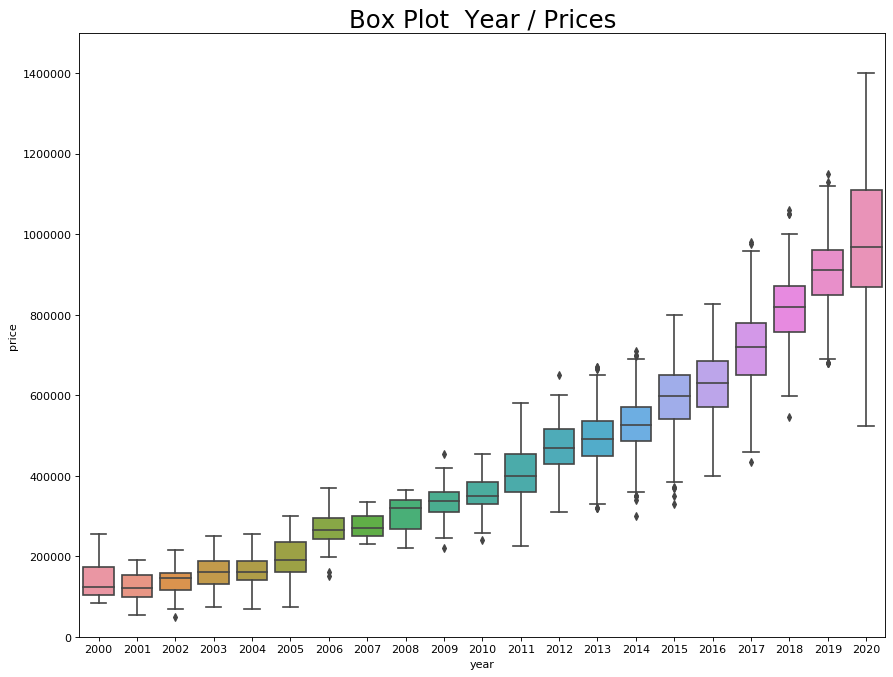

In [350]:
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

In [357]:
# удалим выбросы 'price' по годам:

for name in list(set(df['year'].values.tolist())):
    q25 = df.loc[df['year'] == name]['price'].quantile(0.25)
    q75 = df.loc[df['year'] == name]['price'].quantile(0.75)
    for i in df.loc[df['year'] == name].index.tolist():
        if (df.loc[df['year'] == name]['price'][i] < (q25-1.5*(q75 - q25))) | (df.loc[df['year'] == name]['price'][i] > (q75+1.5*(q75 - q25))):
            df = df.drop([i])

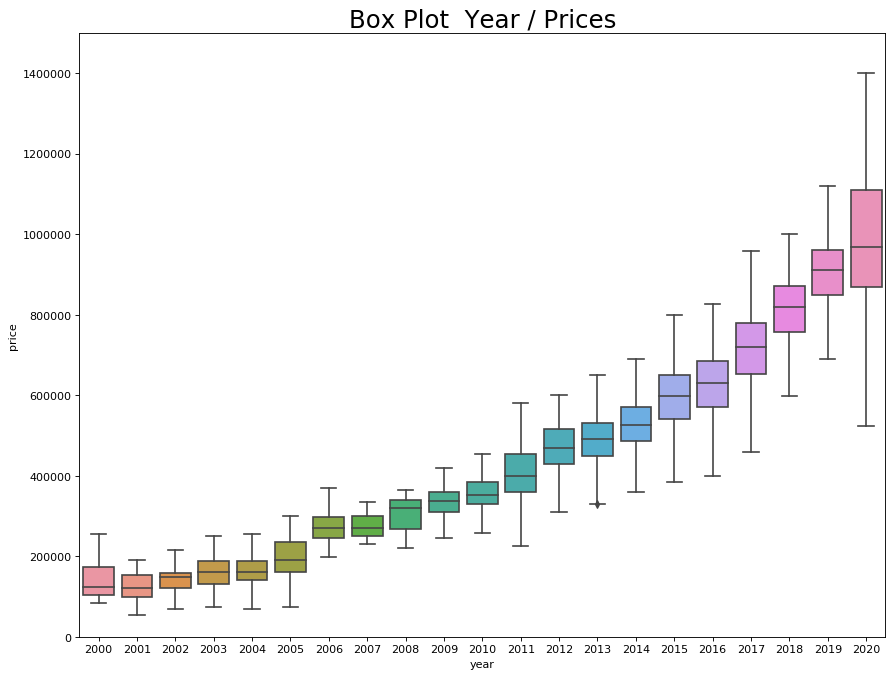

In [358]:
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='year', y='price', data=df, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values

add_n_obs(df,group_col='year', y='price')  

# Decoration
plt.title('Box Plot  Year / Prices', fontsize=22)
plt.ylim(0, 1500000)
plt.show()

In [359]:
X = df.drop(['price'], axis=1)
y = df['price']

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
categorical_features_indices = np.where(X.dtypes == np.object)[0]

model = CatBoostRegressor()
parameters = {'depth'         : [3,4,5],
              'learning_rate' : [0.03,0.05, 0.1],
              'iterations'    : [800],
              'subsample'     : [0.3, 0.5, 1]
            }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(X_train, y_train, cat_features=categorical_features_indices)    

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
    
print("\n The best estimator across ALL searched params:\n",
    grid.best_estimator_)
    
print("\n The best score across ALL searched params:\n",
    grid.best_score_)
    
print("\n The best parameters across ALL searched params:\n",
    grid.best_params_)
    
print("\n ========================================================")

0:	learn: 188725.5484349	total: 4.61ms	remaining: 3.68s
1:	learn: 184425.0964898	total: 10.7ms	remaining: 4.27s
2:	learn: 180246.1843076	total: 15.4ms	remaining: 4.09s
3:	learn: 176197.8757439	total: 19.1ms	remaining: 3.79s
4:	learn: 172280.7820415	total: 25.7ms	remaining: 4.09s
5:	learn: 168490.8709572	total: 29.1ms	remaining: 3.84s
6:	learn: 164717.6973605	total: 34.7ms	remaining: 3.93s
7:	learn: 161209.5967668	total: 38.1ms	remaining: 3.77s
8:	learn: 157676.8018854	total: 41.9ms	remaining: 3.68s
9:	learn: 154261.4729475	total: 44.9ms	remaining: 3.55s
10:	learn: 150902.6447923	total: 47.8ms	remaining: 3.43s
11:	learn: 147648.4071386	total: 51.7ms	remaining: 3.4s
12:	learn: 144502.7498382	total: 54.7ms	remaining: 3.31s
13:	learn: 141412.7245539	total: 57.6ms	remaining: 3.23s
14:	learn: 138476.3509473	total: 59.9ms	remaining: 3.13s
15:	learn: 135688.8718003	total: 63.1ms	remaining: 3.09s
16:	learn: 132969.4418123	total: 66.9ms	remaining: 3.08s
17:	learn: 130354.7971452	total: 70.8ms	re

155:	learn: 54124.4607753	total: 490ms	remaining: 2.02s
156:	learn: 54093.0976659	total: 494ms	remaining: 2.02s
157:	learn: 54060.4739352	total: 499ms	remaining: 2.03s
158:	learn: 54035.5922664	total: 502ms	remaining: 2.02s
159:	learn: 54013.3676912	total: 505ms	remaining: 2.02s
160:	learn: 53990.0536594	total: 508ms	remaining: 2.02s
161:	learn: 53969.9281756	total: 510ms	remaining: 2.01s
162:	learn: 53938.7396413	total: 513ms	remaining: 2.01s
163:	learn: 53913.4211710	total: 516ms	remaining: 2s
164:	learn: 53887.2613543	total: 519ms	remaining: 2s
165:	learn: 53861.8979639	total: 521ms	remaining: 1.99s
166:	learn: 53813.9574112	total: 523ms	remaining: 1.98s
167:	learn: 53778.3873015	total: 526ms	remaining: 1.98s
168:	learn: 53735.8203160	total: 529ms	remaining: 1.97s
169:	learn: 53698.8316656	total: 531ms	remaining: 1.97s
170:	learn: 53682.5275842	total: 534ms	remaining: 1.96s
171:	learn: 53648.4531514	total: 537ms	remaining: 1.96s
172:	learn: 53639.2333891	total: 539ms	remaining: 1.95

306:	learn: 51709.3132025	total: 976ms	remaining: 1.57s
307:	learn: 51697.5270061	total: 977ms	remaining: 1.56s
308:	learn: 51689.6285484	total: 981ms	remaining: 1.56s
309:	learn: 51680.3273292	total: 982ms	remaining: 1.55s
310:	learn: 51674.5999217	total: 984ms	remaining: 1.55s
311:	learn: 51667.3998862	total: 989ms	remaining: 1.55s
312:	learn: 51658.6883273	total: 990ms	remaining: 1.54s
313:	learn: 51647.4944668	total: 993ms	remaining: 1.54s
314:	learn: 51639.2399949	total: 994ms	remaining: 1.53s
315:	learn: 51633.2746939	total: 998ms	remaining: 1.53s
316:	learn: 51618.0338124	total: 1s	remaining: 1.52s
317:	learn: 51614.3918115	total: 1s	remaining: 1.52s
318:	learn: 51603.5992024	total: 1s	remaining: 1.51s
319:	learn: 51587.0730217	total: 1.01s	remaining: 1.51s
320:	learn: 51581.6509195	total: 1.01s	remaining: 1.51s
321:	learn: 51566.4155003	total: 1.01s	remaining: 1.5s
322:	learn: 51553.4475224	total: 1.01s	remaining: 1.5s
323:	learn: 51542.7720748	total: 1.02s	remaining: 1.5s
324:

522:	learn: 50461.2794732	total: 1.45s	remaining: 766ms
523:	learn: 50456.2964607	total: 1.45s	remaining: 762ms
524:	learn: 50453.2642750	total: 1.45s	remaining: 759ms
525:	learn: 50450.2301780	total: 1.45s	remaining: 756ms
526:	learn: 50447.9197220	total: 1.45s	remaining: 753ms
527:	learn: 50443.8171733	total: 1.45s	remaining: 749ms
528:	learn: 50440.5078284	total: 1.46s	remaining: 746ms
529:	learn: 50438.4909409	total: 1.46s	remaining: 742ms
530:	learn: 50436.4891426	total: 1.46s	remaining: 740ms
531:	learn: 50432.1585834	total: 1.46s	remaining: 737ms
532:	learn: 50426.0325375	total: 1.47s	remaining: 734ms
533:	learn: 50424.0162299	total: 1.47s	remaining: 731ms
534:	learn: 50422.6788235	total: 1.47s	remaining: 728ms
535:	learn: 50420.8208261	total: 1.47s	remaining: 724ms
536:	learn: 50413.9870414	total: 1.47s	remaining: 721ms
537:	learn: 50410.3790224	total: 1.47s	remaining: 717ms
538:	learn: 50407.6243929	total: 1.47s	remaining: 714ms
539:	learn: 50404.3933105	total: 1.48s	remaining

690:	learn: 49888.8681861	total: 1.76s	remaining: 277ms
691:	learn: 49886.4955500	total: 1.76s	remaining: 275ms
692:	learn: 49881.1440284	total: 1.76s	remaining: 272ms
693:	learn: 49878.1817493	total: 1.77s	remaining: 270ms
694:	learn: 49877.5432765	total: 1.77s	remaining: 268ms
695:	learn: 49872.4142199	total: 1.77s	remaining: 265ms
696:	learn: 49869.2491938	total: 1.77s	remaining: 262ms
697:	learn: 49864.9188078	total: 1.78s	remaining: 260ms
698:	learn: 49859.9350013	total: 1.78s	remaining: 257ms
699:	learn: 49854.4727129	total: 1.78s	remaining: 255ms
700:	learn: 49849.0874595	total: 1.79s	remaining: 253ms
701:	learn: 49843.2866454	total: 1.79s	remaining: 250ms
702:	learn: 49842.1243211	total: 1.79s	remaining: 247ms
703:	learn: 49836.1448013	total: 1.8s	remaining: 245ms
704:	learn: 49834.1549760	total: 1.8s	remaining: 243ms
705:	learn: 49833.5385894	total: 1.8s	remaining: 240ms
706:	learn: 49829.8029950	total: 1.8s	remaining: 237ms
707:	learn: 49825.7035395	total: 1.81s	remaining: 23

In [361]:
model = CatBoostRegressor(iterations=800,
                          learning_rate=0.03,
                          subsample=1,
                          depth=4)

In [362]:
# Fit model
model.fit(X_train, y_train, cat_features=categorical_features_indices)

0:	learn: 188725.5484349	total: 6.18ms	remaining: 4.93s
1:	learn: 184425.0964898	total: 12.9ms	remaining: 5.13s
2:	learn: 180246.1843076	total: 16.8ms	remaining: 4.47s
3:	learn: 176197.8757439	total: 19.7ms	remaining: 3.93s
4:	learn: 172280.7820415	total: 23.8ms	remaining: 3.79s
5:	learn: 168490.8709572	total: 26ms	remaining: 3.44s
6:	learn: 164717.6973605	total: 29.6ms	remaining: 3.35s
7:	learn: 161209.5967668	total: 32.5ms	remaining: 3.21s
8:	learn: 157676.8018854	total: 36.2ms	remaining: 3.18s
9:	learn: 154261.4729475	total: 39.2ms	remaining: 3.09s
10:	learn: 150902.6447923	total: 41.8ms	remaining: 3s
11:	learn: 147648.4071386	total: 45.9ms	remaining: 3.02s
12:	learn: 144502.7498382	total: 49.3ms	remaining: 2.99s
13:	learn: 141412.7245539	total: 52.6ms	remaining: 2.95s
14:	learn: 138476.3509473	total: 54.8ms	remaining: 2.87s
15:	learn: 135688.8718003	total: 57.8ms	remaining: 2.83s
16:	learn: 132969.4418123	total: 61.1ms	remaining: 2.82s
17:	learn: 130354.7971452	total: 65.5ms	remain

195:	learn: 53143.3006952	total: 653ms	remaining: 2.01s
196:	learn: 53124.5827700	total: 654ms	remaining: 2s
197:	learn: 53107.6983645	total: 659ms	remaining: 2s
198:	learn: 53092.6613159	total: 663ms	remaining: 2s
199:	learn: 53079.8465184	total: 667ms	remaining: 2s
200:	learn: 53067.8125914	total: 670ms	remaining: 2s
201:	learn: 53051.4603201	total: 672ms	remaining: 1.99s
202:	learn: 53040.2521354	total: 676ms	remaining: 1.99s
203:	learn: 53026.1715365	total: 680ms	remaining: 1.99s
204:	learn: 53012.2618912	total: 682ms	remaining: 1.98s
205:	learn: 52998.2342881	total: 685ms	remaining: 1.98s
206:	learn: 52971.8924959	total: 689ms	remaining: 1.97s
207:	learn: 52956.9285536	total: 694ms	remaining: 1.97s
208:	learn: 52941.6867770	total: 696ms	remaining: 1.97s
209:	learn: 52932.5148443	total: 699ms	remaining: 1.96s
210:	learn: 52921.0094475	total: 702ms	remaining: 1.96s
211:	learn: 52908.1694052	total: 705ms	remaining: 1.95s
212:	learn: 52885.6551093	total: 706ms	remaining: 1.95s
213:	le

367:	learn: 51161.1075553	total: 1.14s	remaining: 1.33s
368:	learn: 51150.6492634	total: 1.14s	remaining: 1.33s
369:	learn: 51146.6521871	total: 1.14s	remaining: 1.33s
370:	learn: 51138.4698717	total: 1.15s	remaining: 1.33s
371:	learn: 51133.8364348	total: 1.15s	remaining: 1.32s
372:	learn: 51128.9898280	total: 1.15s	remaining: 1.32s
373:	learn: 51125.1659645	total: 1.15s	remaining: 1.31s
374:	learn: 51121.2745546	total: 1.15s	remaining: 1.31s
375:	learn: 51109.5231923	total: 1.16s	remaining: 1.3s
376:	learn: 51104.9647823	total: 1.16s	remaining: 1.3s
377:	learn: 51100.3378665	total: 1.16s	remaining: 1.29s
378:	learn: 51096.3087836	total: 1.16s	remaining: 1.29s
379:	learn: 51092.6567000	total: 1.16s	remaining: 1.28s
380:	learn: 51086.3719441	total: 1.16s	remaining: 1.28s
381:	learn: 51080.9298400	total: 1.17s	remaining: 1.28s
382:	learn: 51077.4090469	total: 1.17s	remaining: 1.27s
383:	learn: 51073.9553918	total: 1.17s	remaining: 1.27s
384:	learn: 51070.5069549	total: 1.17s	remaining: 

529:	learn: 50438.4909409	total: 1.45s	remaining: 737ms
530:	learn: 50436.4891426	total: 1.45s	remaining: 734ms
531:	learn: 50432.1585834	total: 1.45s	remaining: 731ms
532:	learn: 50426.0325375	total: 1.45s	remaining: 728ms
533:	learn: 50424.0162299	total: 1.46s	remaining: 725ms
534:	learn: 50422.6788235	total: 1.46s	remaining: 722ms
535:	learn: 50420.8208261	total: 1.46s	remaining: 719ms
536:	learn: 50413.9870414	total: 1.46s	remaining: 716ms
537:	learn: 50410.3790224	total: 1.46s	remaining: 713ms
538:	learn: 50407.6243929	total: 1.46s	remaining: 709ms
539:	learn: 50404.3933105	total: 1.47s	remaining: 707ms
540:	learn: 50401.7479785	total: 1.47s	remaining: 703ms
541:	learn: 50396.9394559	total: 1.47s	remaining: 700ms
542:	learn: 50390.8942413	total: 1.47s	remaining: 697ms
543:	learn: 50387.0947043	total: 1.47s	remaining: 694ms
544:	learn: 50383.6991849	total: 1.48s	remaining: 691ms
545:	learn: 50382.0576164	total: 1.48s	remaining: 688ms
546:	learn: 50379.2834655	total: 1.48s	remaining

704:	learn: 49834.1549760	total: 1.76s	remaining: 237ms
705:	learn: 49833.5385894	total: 1.76s	remaining: 234ms
706:	learn: 49829.8029950	total: 1.76s	remaining: 232ms
707:	learn: 49825.7035395	total: 1.76s	remaining: 229ms
708:	learn: 49824.1475315	total: 1.77s	remaining: 227ms
709:	learn: 49822.2342126	total: 1.77s	remaining: 224ms
710:	learn: 49817.1246467	total: 1.77s	remaining: 222ms
711:	learn: 49816.1365209	total: 1.77s	remaining: 219ms
712:	learn: 49811.2823198	total: 1.77s	remaining: 216ms
713:	learn: 49807.2528935	total: 1.77s	remaining: 214ms
714:	learn: 49801.1820800	total: 1.78s	remaining: 211ms
715:	learn: 49798.7934948	total: 1.78s	remaining: 209ms
716:	learn: 49794.8792134	total: 1.78s	remaining: 206ms
717:	learn: 49790.1461619	total: 1.78s	remaining: 204ms
718:	learn: 49784.1564567	total: 1.79s	remaining: 202ms
719:	learn: 49780.3608903	total: 1.79s	remaining: 199ms
720:	learn: 49775.7632730	total: 1.79s	remaining: 196ms
721:	learn: 49770.3950056	total: 1.79s	remaining

In [363]:
# Get predictions
preds = model.predict(X_test)

In [364]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 51961.482714


In [369]:
my_df = pd.DataFrame({'model': ['Kia Rio III рестайлинг'], 'year': [2015], 'km_age': [68000], 'engine_power': [123],
                     'transmission': ['автоматическая'], 'owners_count': ['1 владелец']})

In [370]:
my_df

,model,year,km_age,engine_power,transmission,owners_count
0,Kia Rio III рестайлинг,2015,68000,123,автоматическая,1 владелец


In [371]:
my_preds = model.predict(my_df)

In [372]:
my_preds

array([675398.3246841])